# <font color= #FF1555 size= 6 ><center><u>Time Series Forecasting</u></center></font>

# Problem 1: Dataset - Sparkling

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### Data Dictionary:

<b>Variable Name</b><br>
YearMonth<br>
Sparkling<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 1. Read the data as an appropriate Time Series data and plot the data.
### Read the data from the '.csv' file as a monthly Time Series.

In [2]:
df = pd.read_csv('Sparkling.csv')
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [3]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [5]:
df.set_index('Time_Stamp',inplace=True)
df.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

### Plot the Time Series to understand the behaviour of the data.

In [6]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

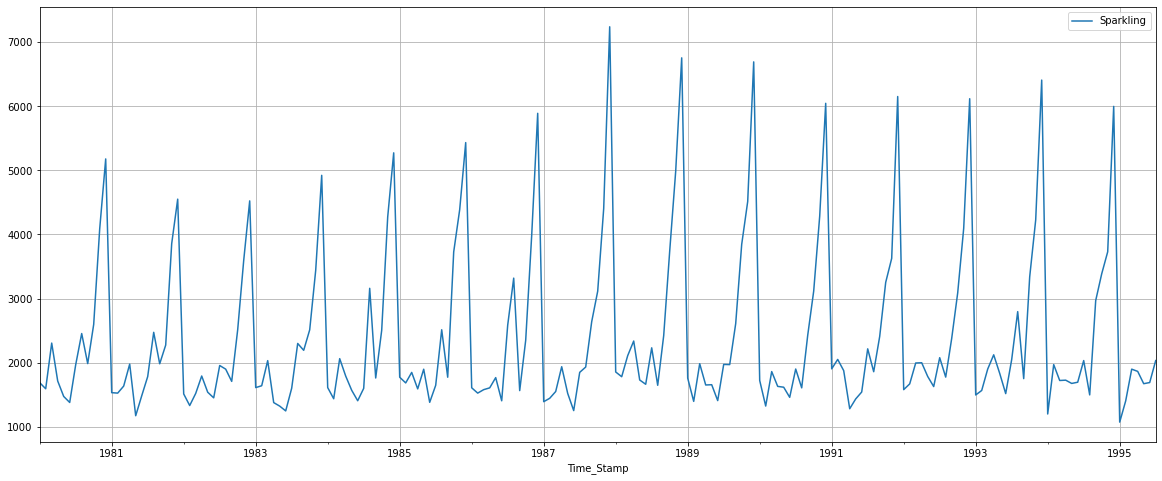

In [7]:
df.plot()
plt.grid();

We can see that there is no trend with a seasonal pattern.

### Check the basic measures of descriptive statistics

In [8]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


<b>Inference:</b>
<br>
• There are 187 records present in the dataset. There is no records have null values in the dataset

### Plot a boxplot to understand the spread of sales across different years and within different months across years.

### Yearly Boxplot

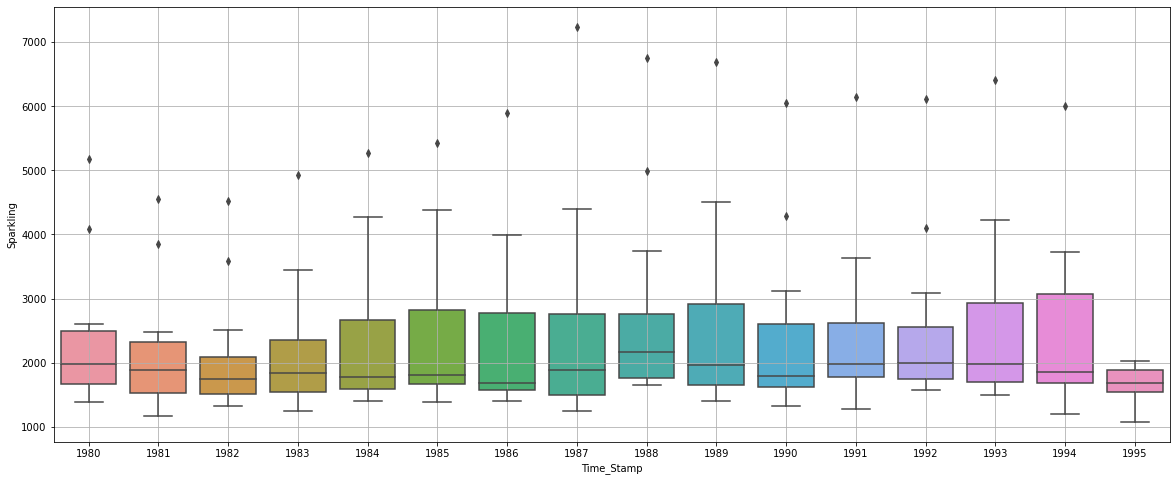

In [11]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

The yearly boxplots also shows that the Sales have almost no change between the years.

### Monthly Plot

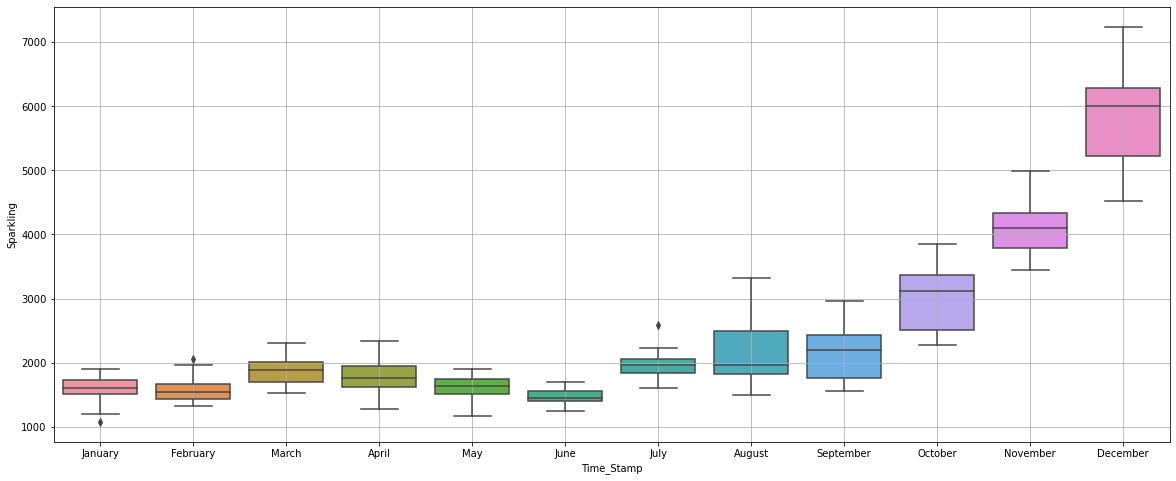

In [12]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

There is a clear distinction of 'sales' within different months spread across various years. The highest such numbers are being recorded in the month of October, November and December across various years.

## Plot a time series monthplot to understand the spread of Sales across different years and within different months across years.

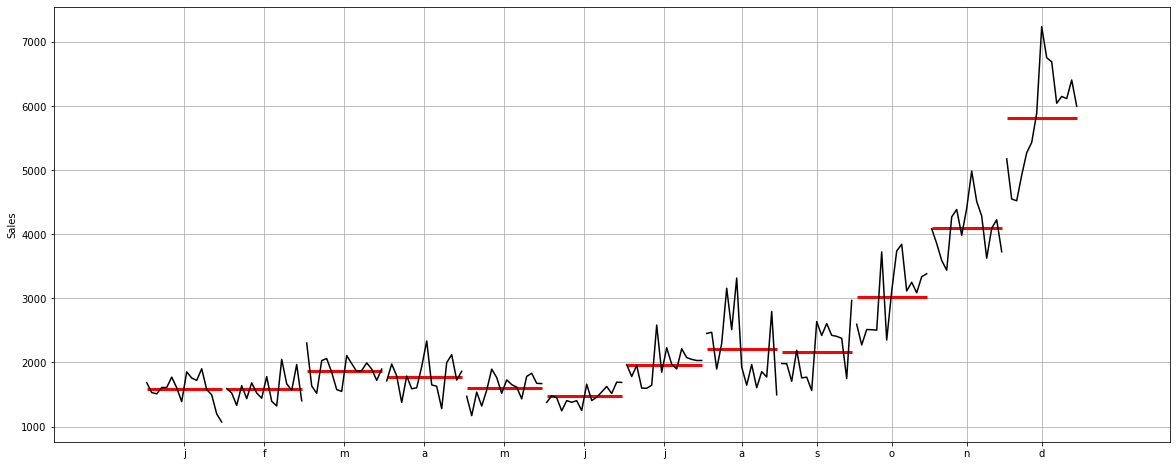

In [13]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Sparkling' in this case) across various months. The red line is the median value.

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Plot the Time Series according to different months for different years.

In [14]:
df.drop(labels='YearMonth',inplace=True,axis=1)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [15]:
df['Sparkling']

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
              ... 
1995-03-31    1897
1995-04-30    1862
1995-05-31    1670
1995-06-30    1688
1995-07-31    2031
Name: Sparkling, Length: 187, dtype: int64

### Plot a graph of monthly RetailSales across years.

In [16]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, 
                                        index = df.index.year)

yearly_sales_across_months

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

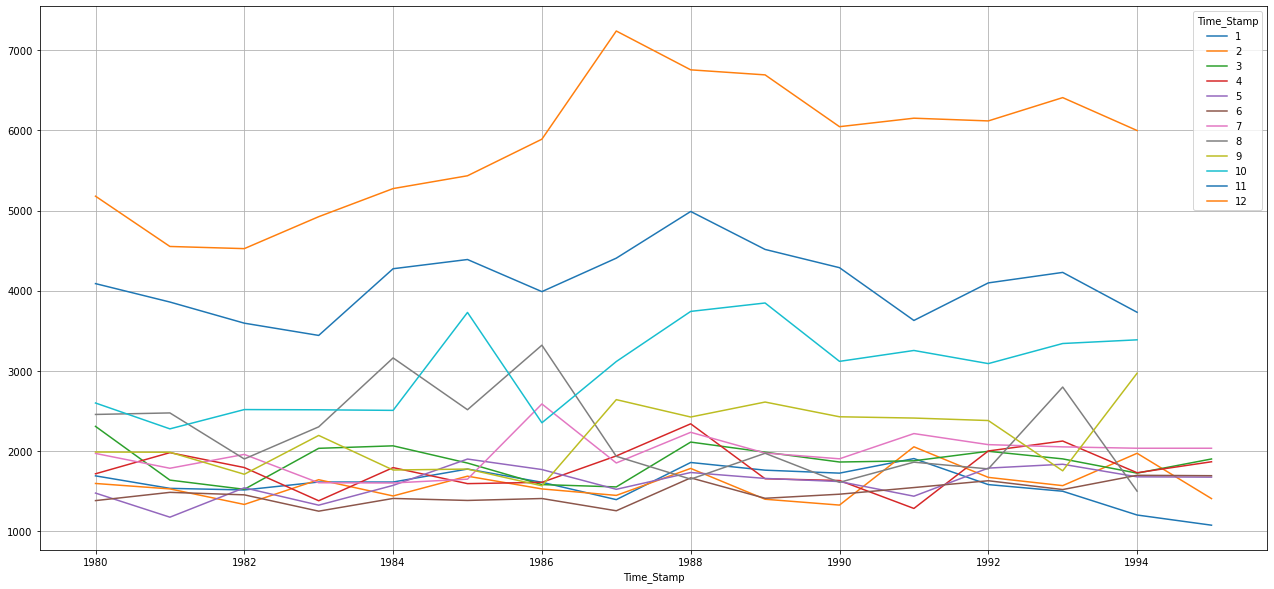

In [17]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

### Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

Yearly Plot

In [18]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

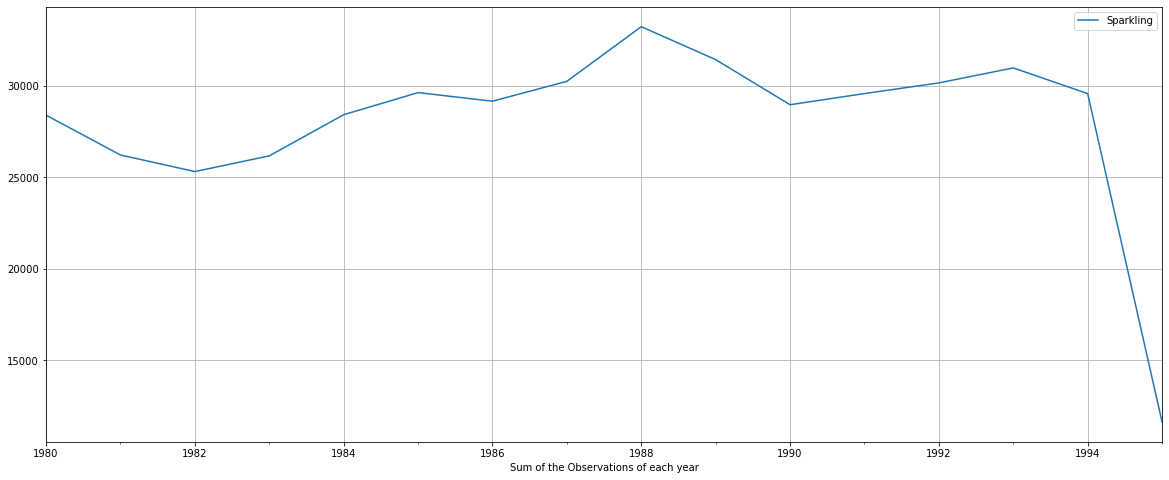

In [19]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [20]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Sparkling
Time_Stamp             
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

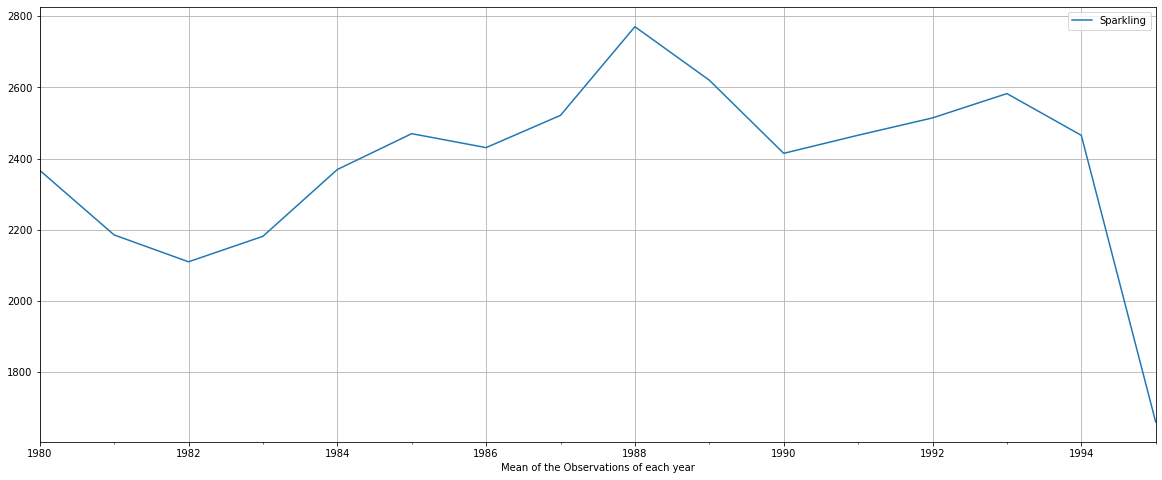

In [21]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

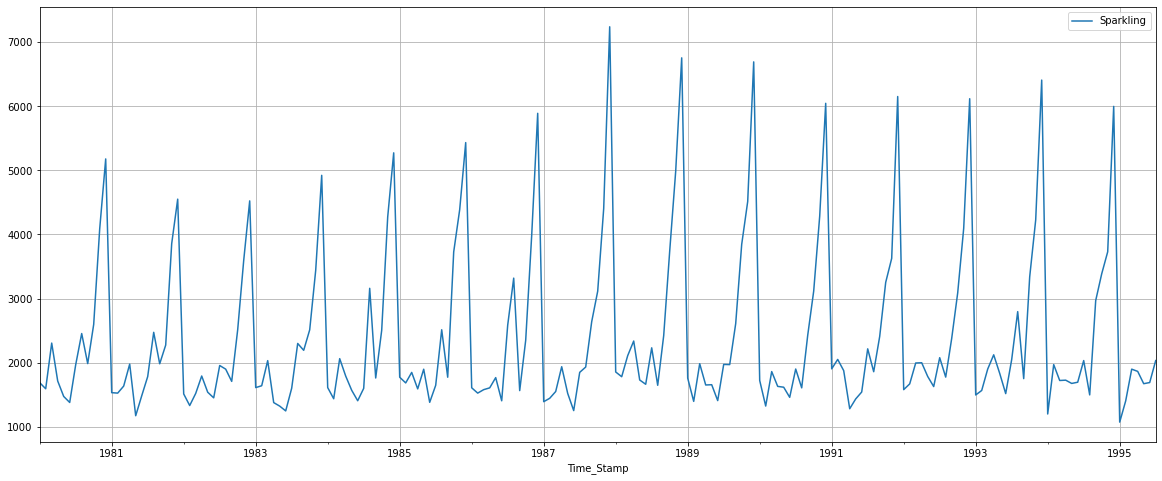

In [22]:
df.plot()
plt.grid();

Quarterly Plot

In [23]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
Time_Stamp           
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

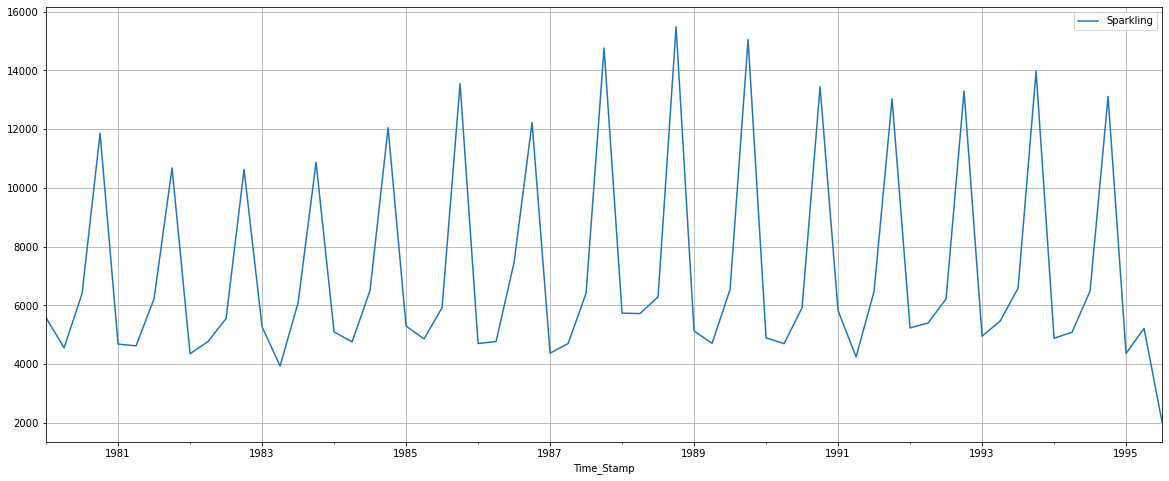

In [24]:
df_quarterly_sum.plot();
plt.grid()

In [25]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
Time_Stamp             
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

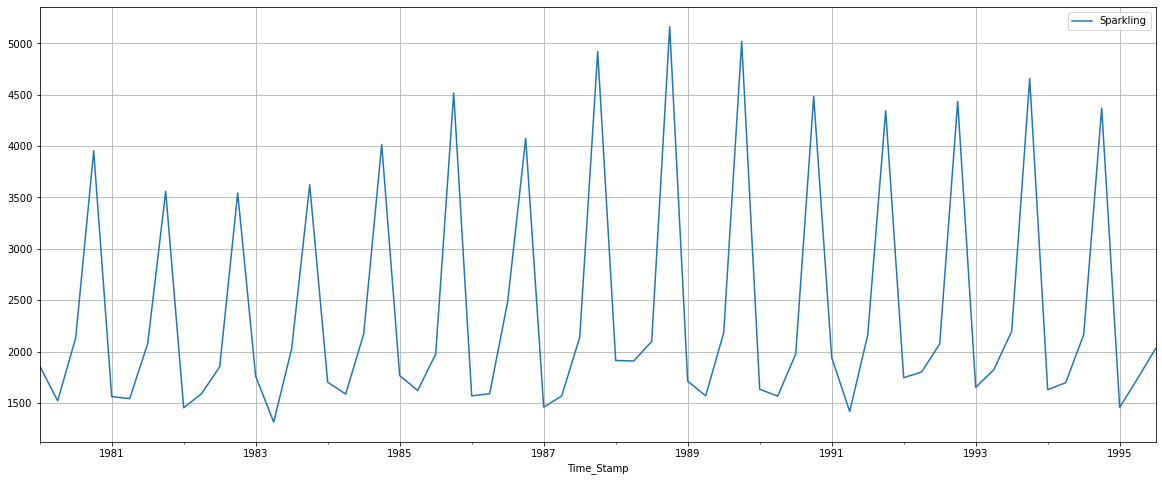

In [26]:
df_quarterly_mean.plot();
plt.grid()

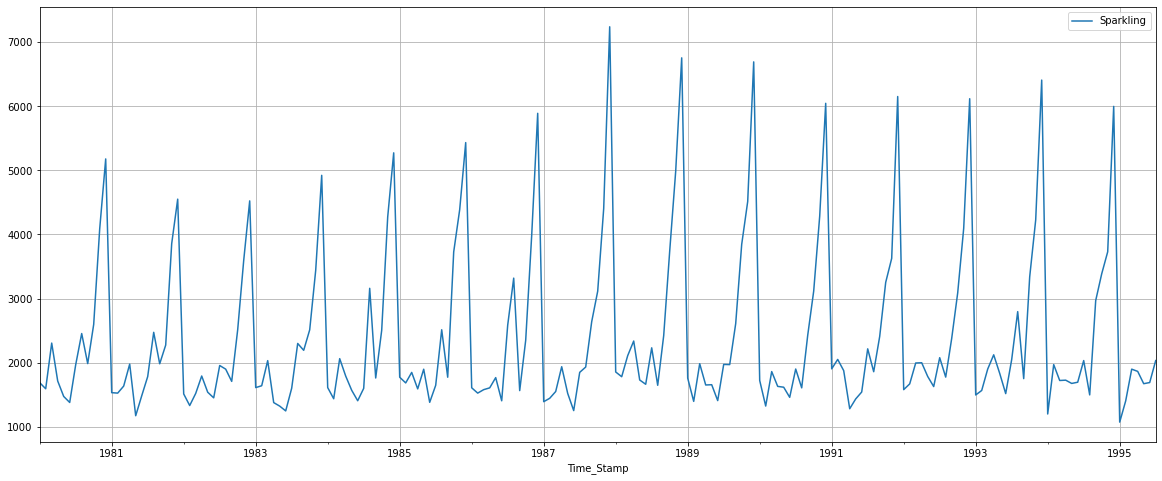

In [27]:
df.plot()
plt.grid();

Daily plot

In [28]:
df_daily_sum = df.resample('D').sum()
df_daily_sum

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0
...               ...
1995-07-27          0
1995-07-28          0
1995-07-29          0
1995-07-30          0
1995-07-31       2031

[5661 rows x 1 columns]

The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

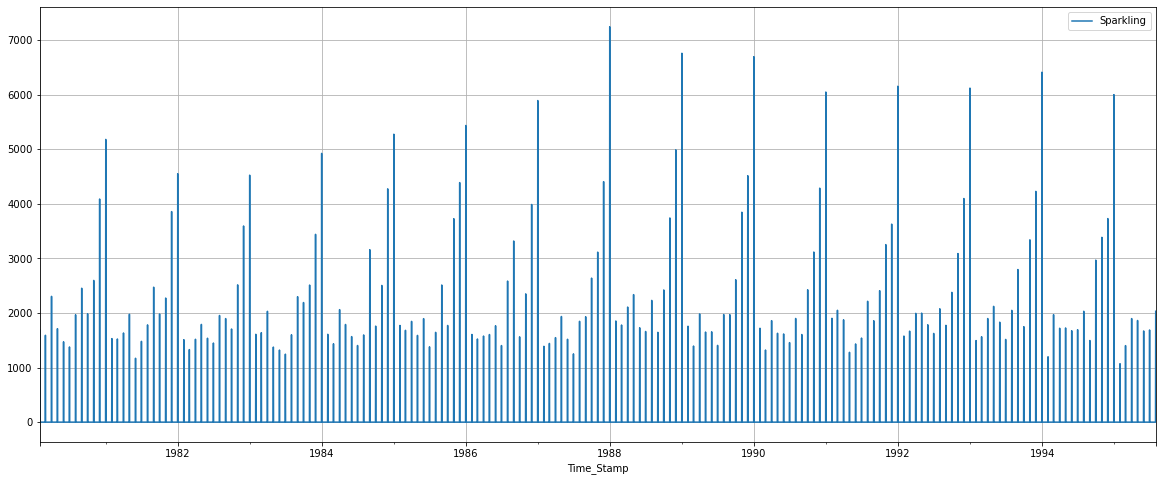

In [29]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data can be understood by resampling the data keeping the intervals very large. So, We are not going to consider this plot.

Decade Plot

In [30]:
df_decade_sum = df.resample('5Y').sum()
df_decade_sum

Sparkling
Time_Stamp           
1980-12-31      28406
1985-12-31     135799
1990-12-31     153094
1995-12-31     131953

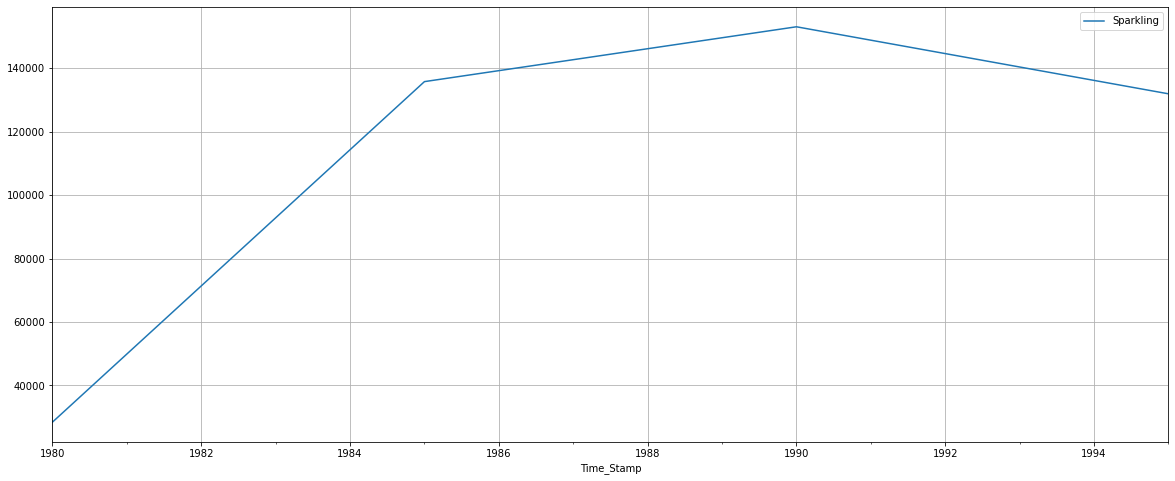

In [31]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 5 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

### Missing Value Handling

There is no missing values

In [32]:
df_2=df.copy()

Decompose is not allowed the data set with missing values. Since no missing values present in the data we are going to use original dataframe df_2 to decompose the time series.

### Decompose the Time Series

Additive Model

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

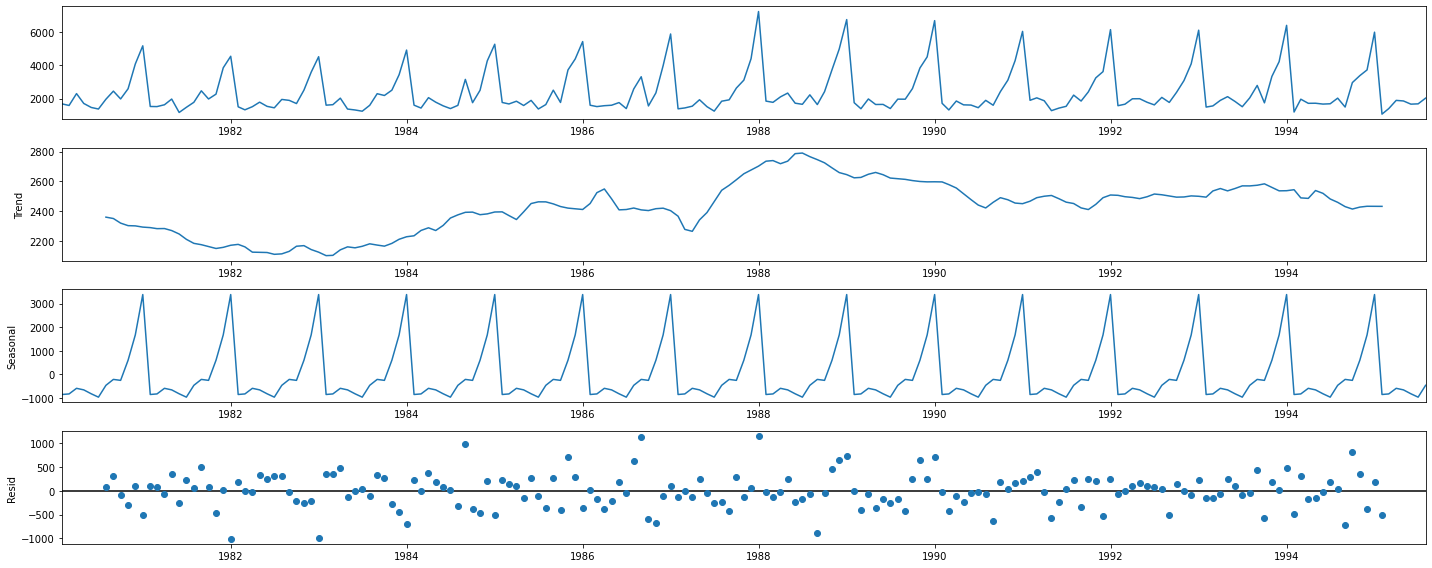

In [34]:
decomposition = seasonal_decompose(df_2,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a slight increase order trend in the data. There is a seasonality as well.

In [35]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [36]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [37]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2431.502265
1980-08-31    2667.332821
1980-09-30    2238.677265
1980-10-31    1996.230043
1980-11-30    2411.932821
1980-12-31    1792.016154
dtype: float64

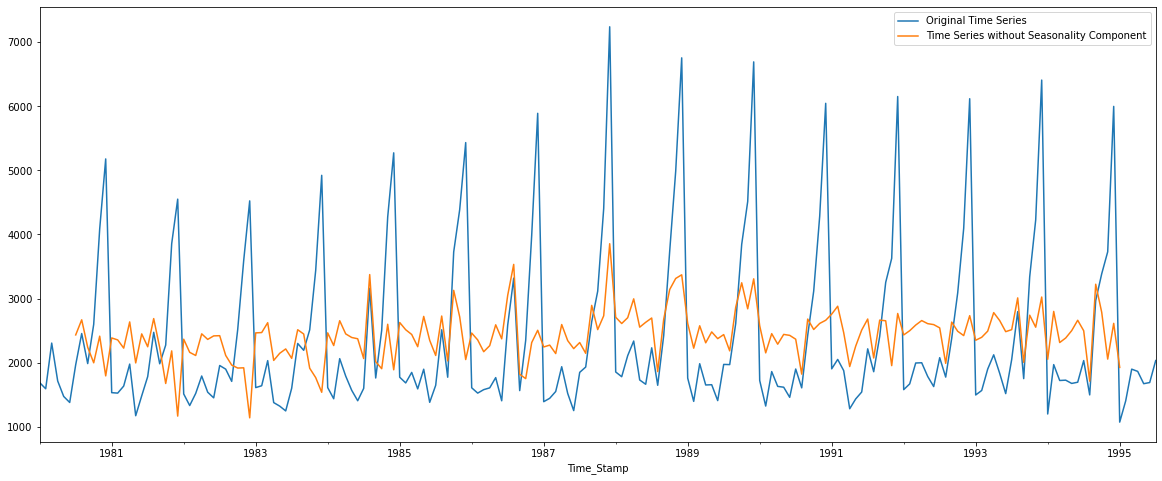

In [38]:
df_2.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

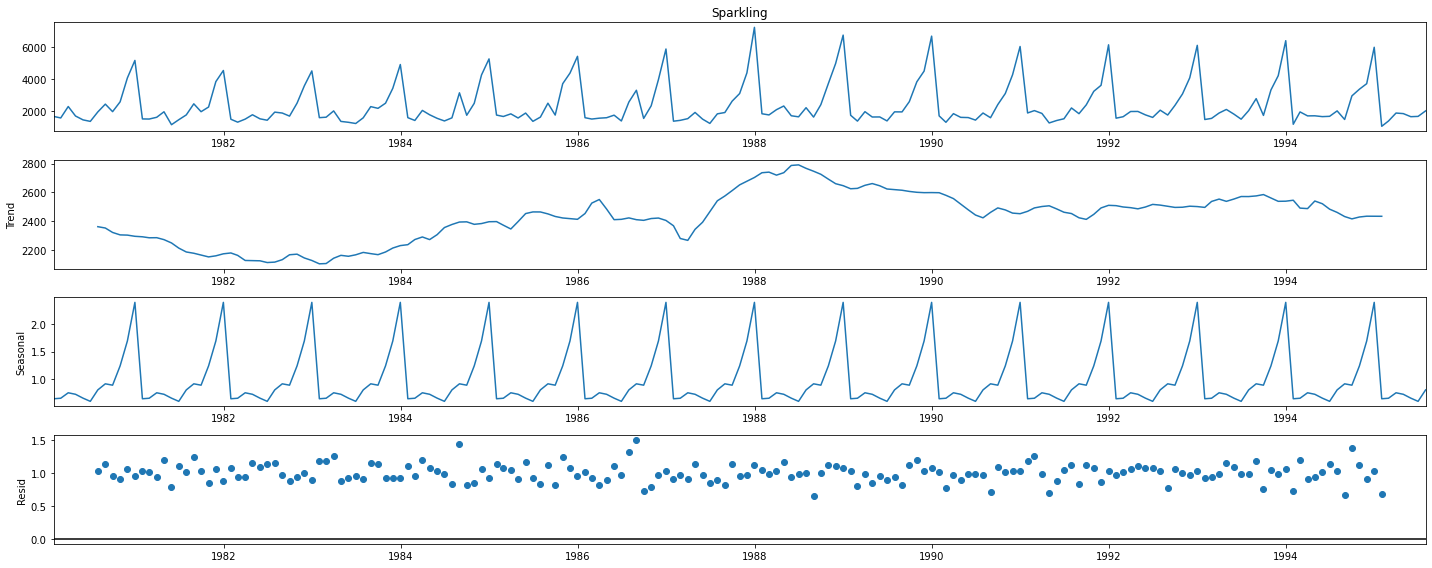

In [39]:
decomposition = seasonal_decompose(df_2['Sparkling'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [40]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

### Plot the Empirical Cumulative Distribution.

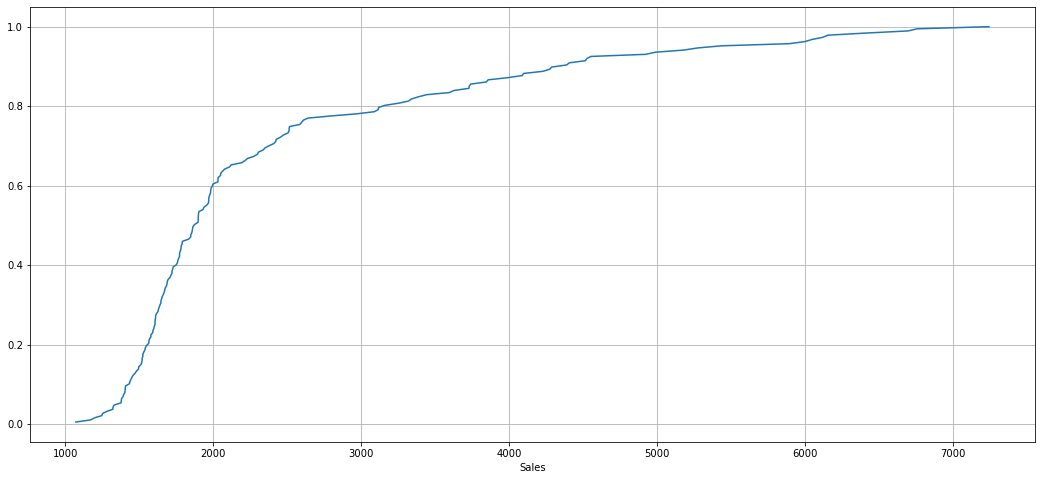

In [41]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_2['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

## Plot the average Sales per month and the month on month percentage change of Sales.

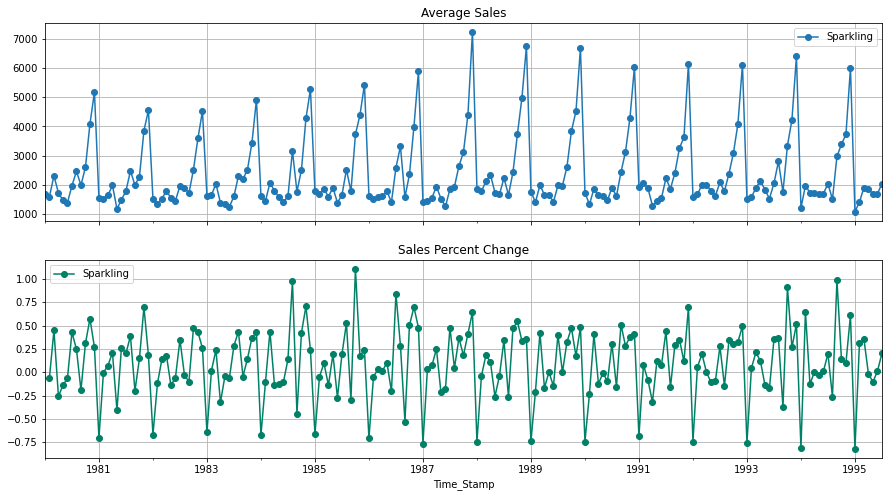

In [42]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df_2.index)["Sparkling"].mean()
pct_change = df.groupby(df_2.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

The above two graphs tells us the Average 'Sales' and the Percentage change of 'Sales' with respect to the time.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

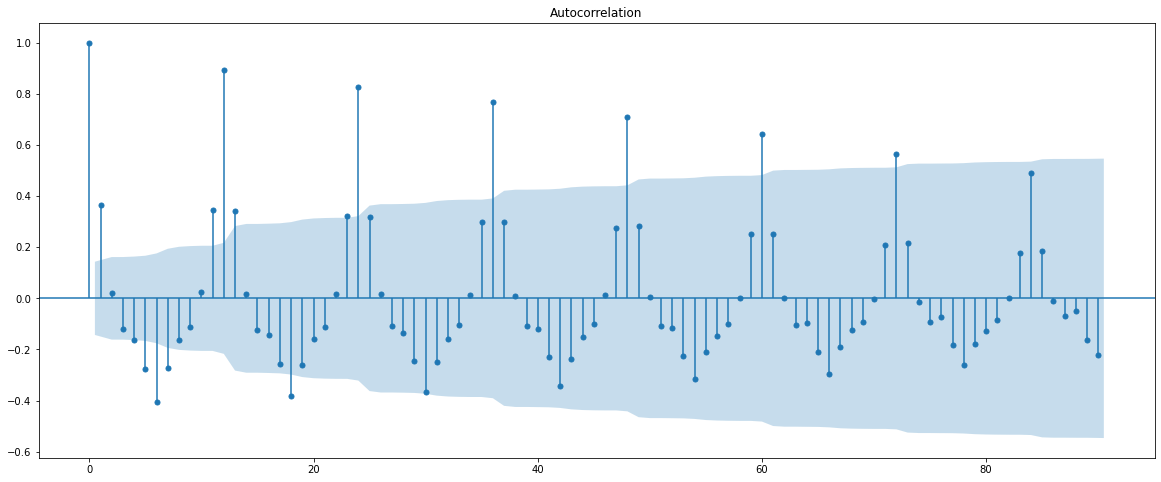

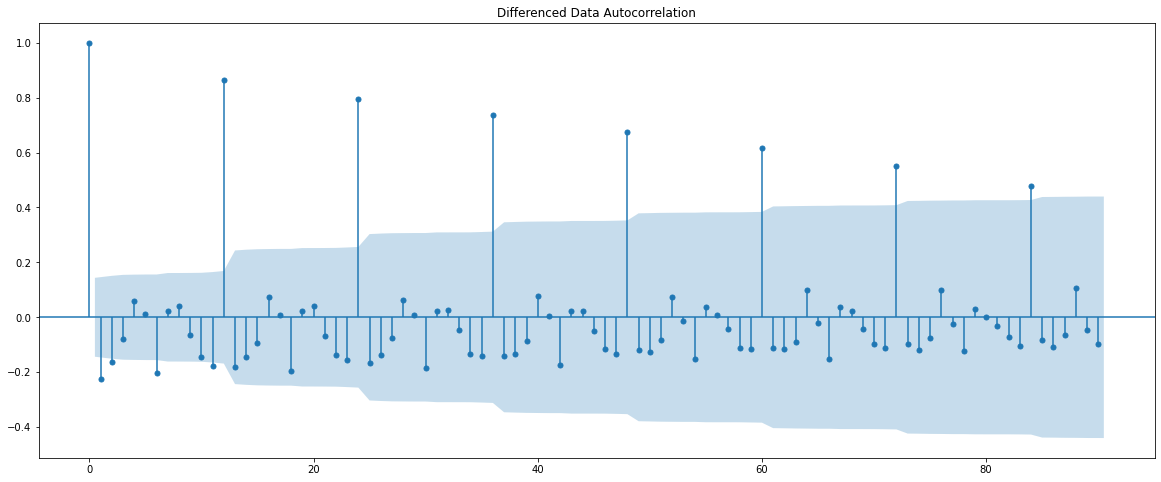

In [44]:
plot_acf(df_2['Sparkling'],lags=90)
plot_acf(df_2['Sparkling'].diff().dropna(),lags=90,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


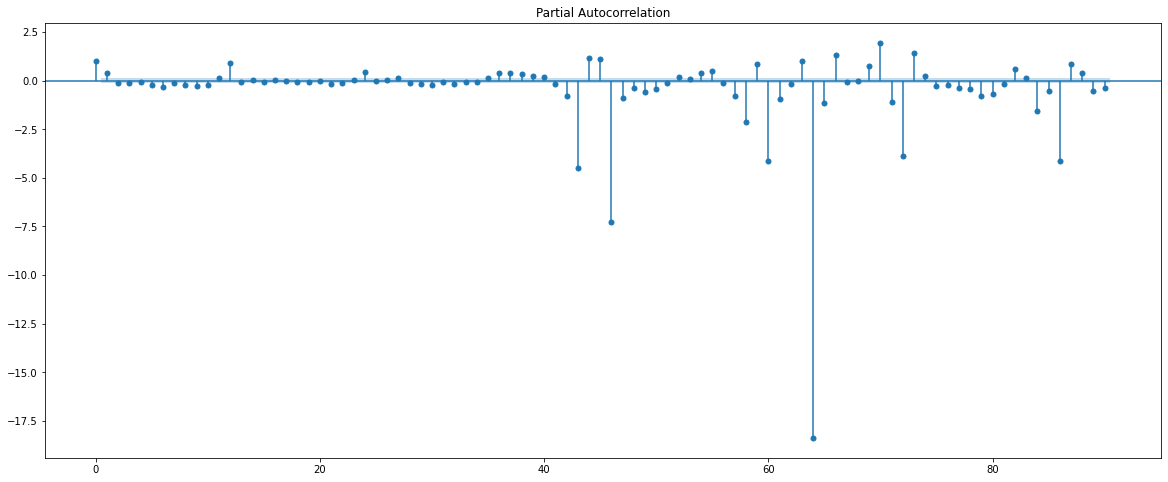

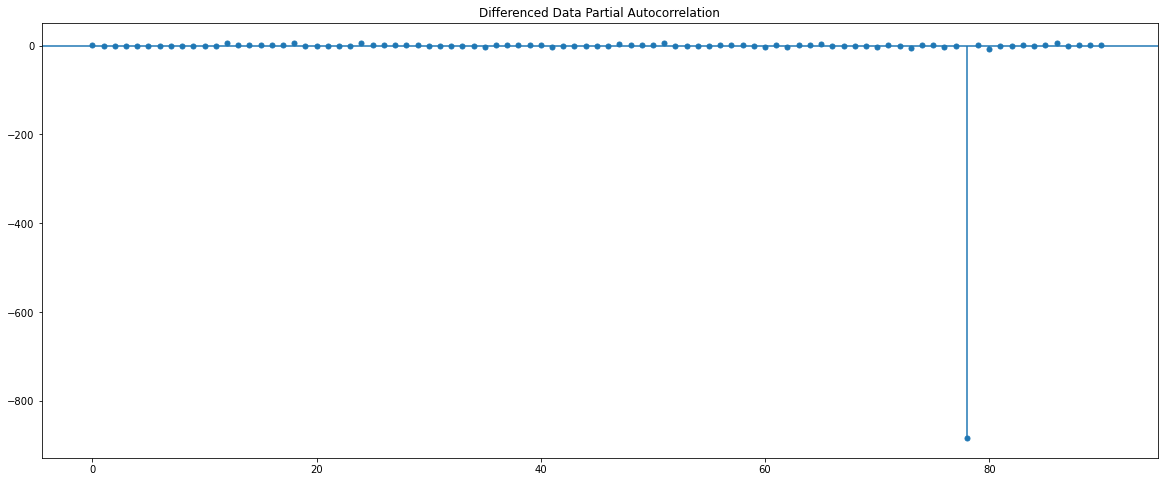

In [45]:
plot_pacf(df_2['Sparkling'],lags=90)
plot_pacf(df_2['Sparkling'].diff().dropna(),lags=90,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

## 3. Split the data into training and test. The test data should start in 1991.

#### Split the data into train and test and plot the training and test data.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [46]:
train=df_2[df_2.index.year < 1991]
test=df_2[df_2.index.year >= 1991]

In [47]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [48]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [49]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Building different models and comparing the accuracy metrics.

### Model 1: Linear Regression

In [50]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [51]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [52]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

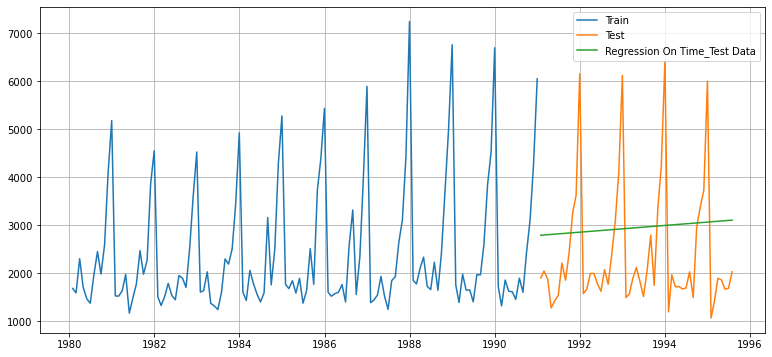

In [56]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

Defining the accuracy metrics.

In [57]:
from sklearn import metrics

Model Evaluation

In [58]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


Model 2: Naive Approach: y^t+1=yt

In [59]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [60]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

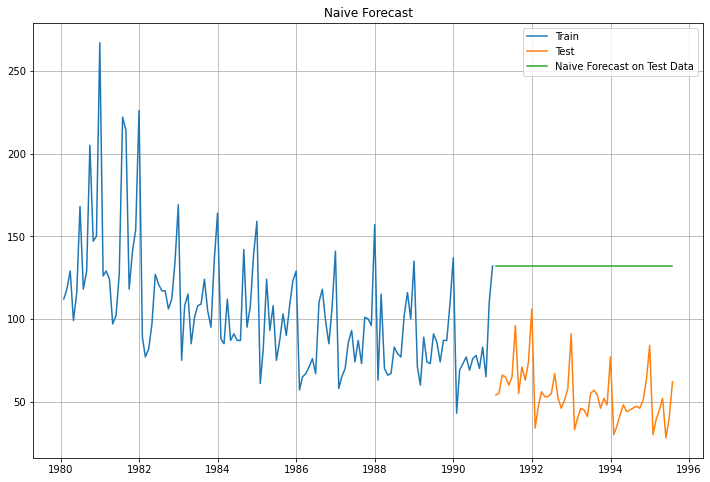

In [71]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [61]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [62]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [63]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

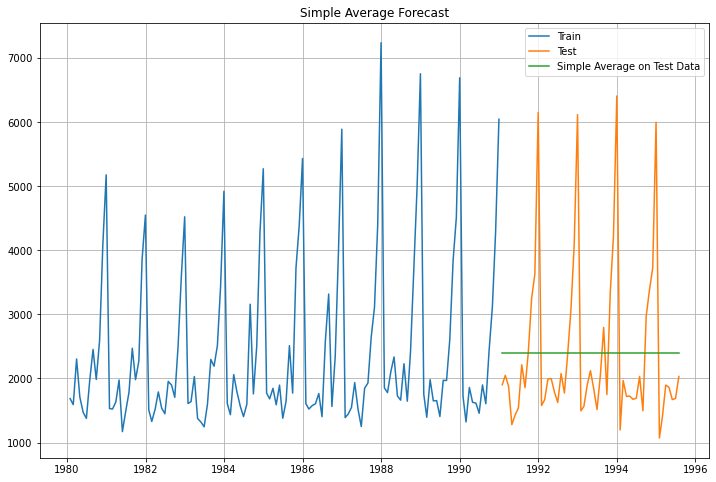

In [64]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model Evaluation

In [65]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [66]:
resultsDf = pd.DataFrame({'Test RMSE': []})

resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_1])

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])

resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [67]:
MovingAverage = df_2.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Trailing moving averages

In [68]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

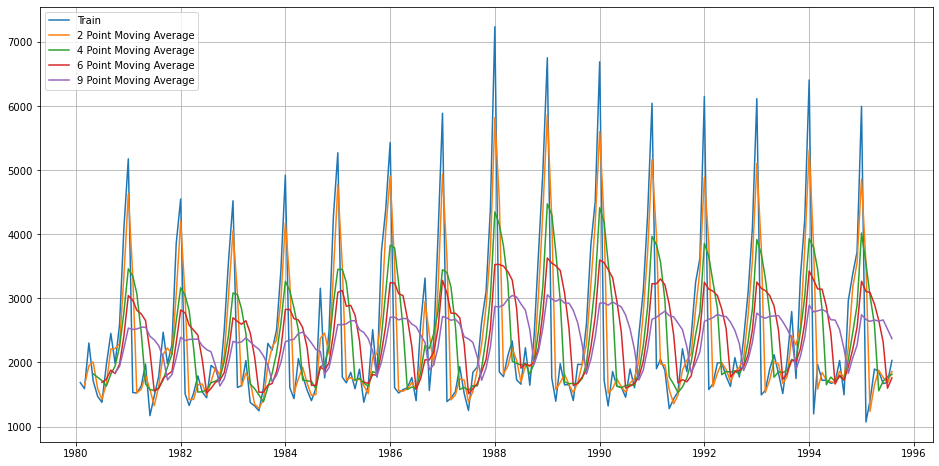

In [69]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [70]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

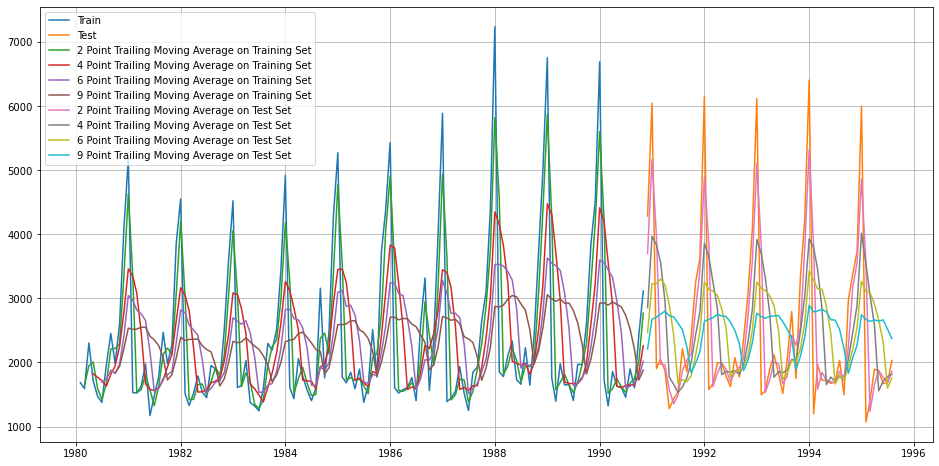

In [71]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

Model Evaluation

In [72]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9)) 

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653 


In [73]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   811.178937
4pointTrailingMovingAverage  1184.213295
6pointTrailingMovingAverage  1337.200524
9pointTrailingMovingAverage  1422.653281

Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

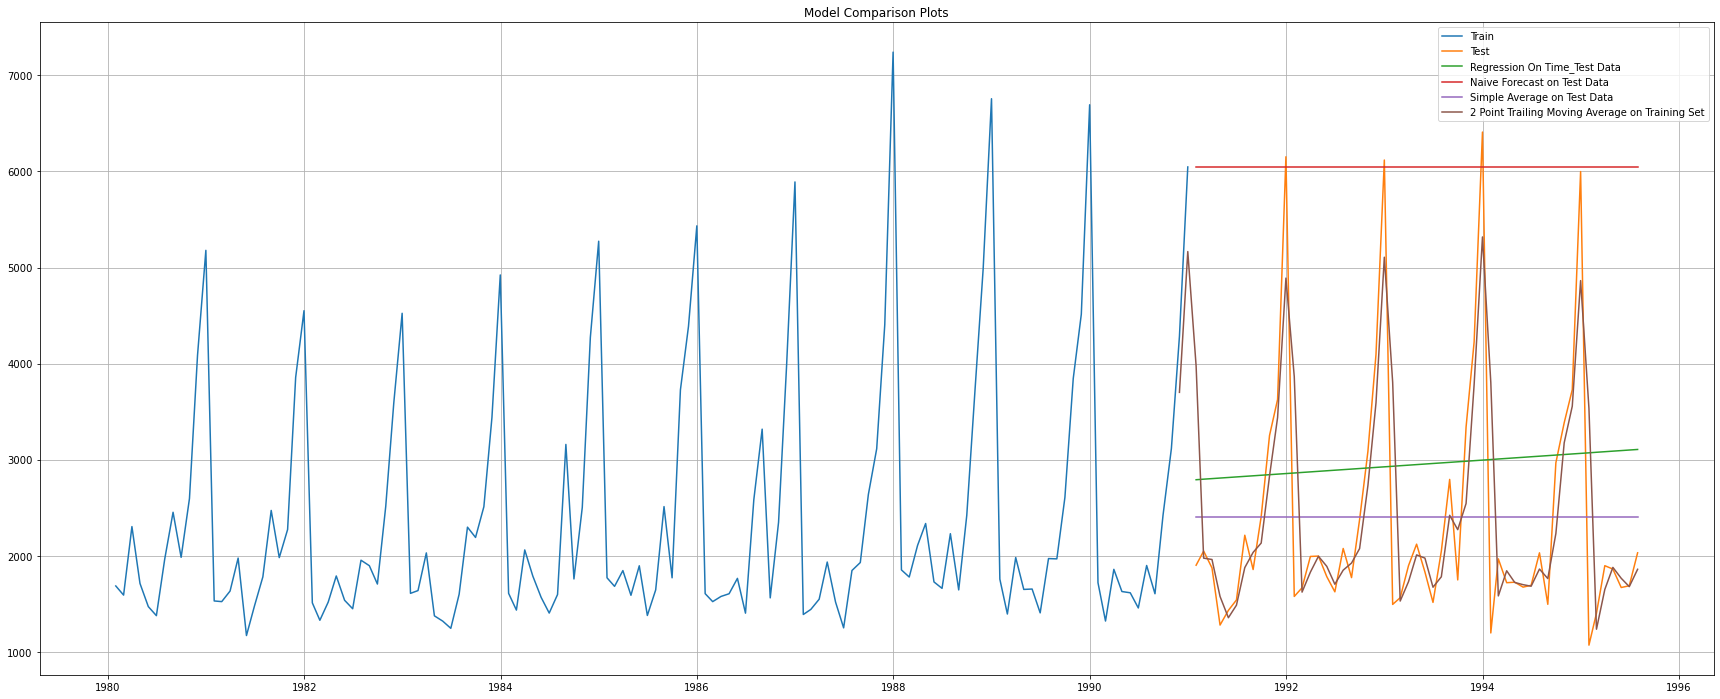

In [74]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

Method 5: Simple Exponential Smoothing

In [76]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [77]:
SES_train = train.copy()
SES_test = test.copy()

In [78]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [79]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [80]:
model_SES_autofit.params

{'smoothing_level': 0.04960736049406556,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2151.614314422547,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2725.336037
1991-02-28       2049  2725.336037
1991-03-31       1874  2725.336037
1991-04-30       1279  2725.336037
1991-05-31       1432  2725.336037

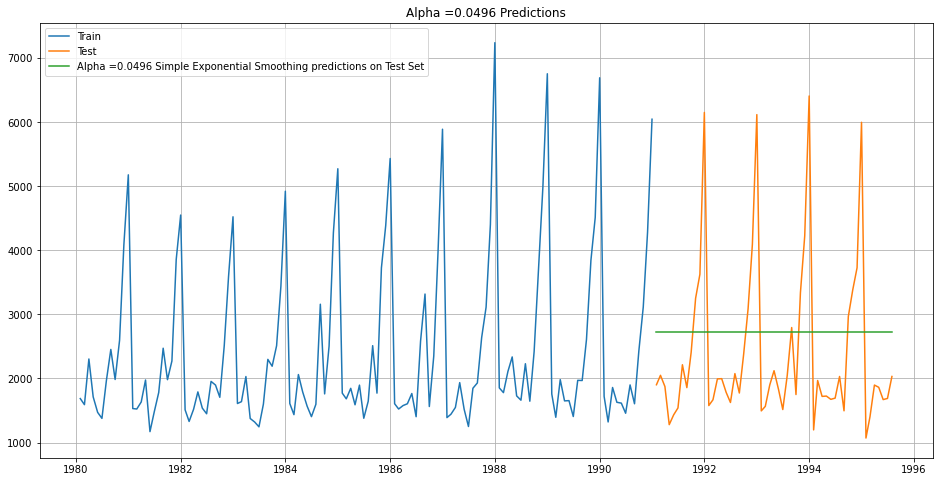

In [99]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions');

Model Evaluation for α = 0.0496 : Simple Exponential Smoothing

In [100]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.135


In [101]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0496,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                         1389.135175
NaiveModel                               3864.279352
SimpleAverageModel                       1275.081804
2pointTrailingMovingAverage               811.178937
4pointTrailingMovingAverage              1184.213295
6pointTrailingMovingAverage              1337.200524
9pointTrailingMovingAverage              1422.653281
Alpha=0.995,SimpleExponentialSmoothing   1316.135411
Alpha=0.1,SimpleExponentialSmoothing     1375.393398
Alpha=0.0496,SimpleExponentialSmoothing  1316.135411

In [102]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [103]:
np.any(np.isnan(resultsDf_6))

False

In [104]:
np.all(np.isfinite(resultsDf_6))

True

In [105]:
for i in np.arange(0.0,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

Model Evaluation

In [106]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
1           0.1  1333.873836  1375.393398
0           0.0  1483.667178  1460.954675
2           0.2  1356.042987  1595.206839
3           0.3  1359.511747  1935.507132
4           0.4  1352.588879  2311.919615
5           0.5  1344.004369  2666.351413
6           0.6  1338.805381  2979.204388
7           0.7  1338.844308  3249.944092
8           0.8  1344.462091  3483.801006
9           0.9  1355.723518  3686.794285

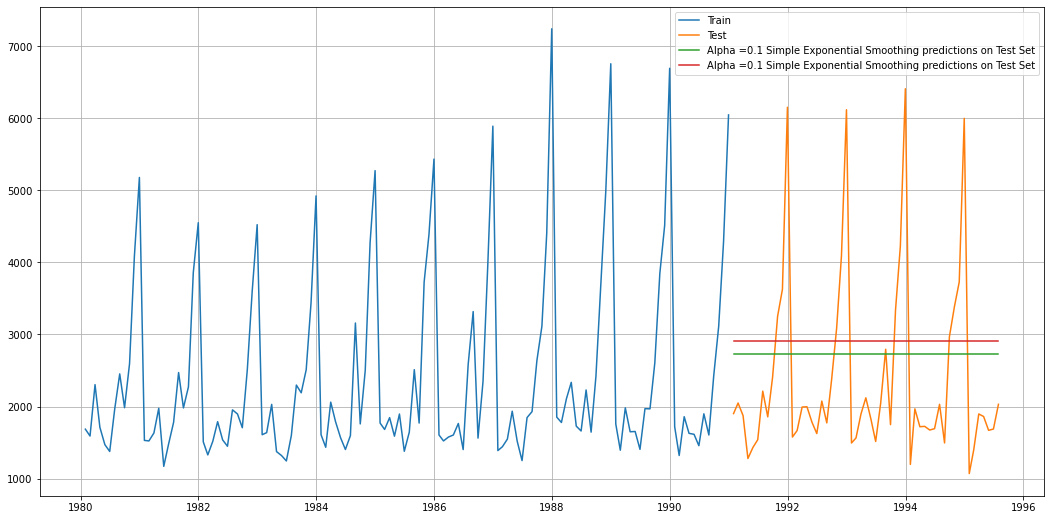

In [200]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [108]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                         1389.135175
NaiveModel                               3864.279352
SimpleAverageModel                       1275.081804
2pointTrailingMovingAverage               811.178937
4pointTrailingMovingAverage              1184.213295
6pointTrailingMovingAverage              1337.200524
9pointTrailingMovingAverage              1422.653281
Alpha=0.995,SimpleExponentialSmoothing   1316.135411
Alpha=0.1,SimpleExponentialSmoothing     1375.393398
Alpha=0.0496,SimpleExponentialSmoothing  1316.135411
Alpha=0.1,SimpleExponentialSmoothing     1375.393398

Method 6: Double Exponential Smoothing (Holt's Model)

Two parameters α and β are estimated in this model. Level and Trend are accounted for in this model.

In [109]:
DES_train = train.copy()
DES_test = test.copy()

In [110]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [111]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [112]:
for i in np.arange(0.0,1.1,0.1):
    for j in np.arange(0.0,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [208]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0             0.0          0.0  8117.499496  16038.864923
1             0.0          0.1  8117.499496  16038.864923
2             0.0          0.2  8117.499496  16038.864923
3             0.0          0.3  8117.499496  16038.864923
4             0.0          0.4  8117.499496  16038.864923
..            ...          ...          ...           ...
116           1.0          0.6  1753.402326  49327.087977
117           1.0          0.7  1825.187155  52655.765663
118           1.0          0.8  1902.013709  55442.273880
119           1.0          0.9  1985.368445  57823.177011
120           1.0          1.0  2077.672157  59877.076519

[121 rows x 4 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' values.

In [114]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
12           0.1          0.1  1382.520870  1778.564670
66           0.6          0.0  1353.081728  2004.479267
77           0.7          0.0  1349.696523  2024.922482
55           0.5          0.0  1363.627617  2046.410581
88           0.8          0.0  1352.968870  2080.557083

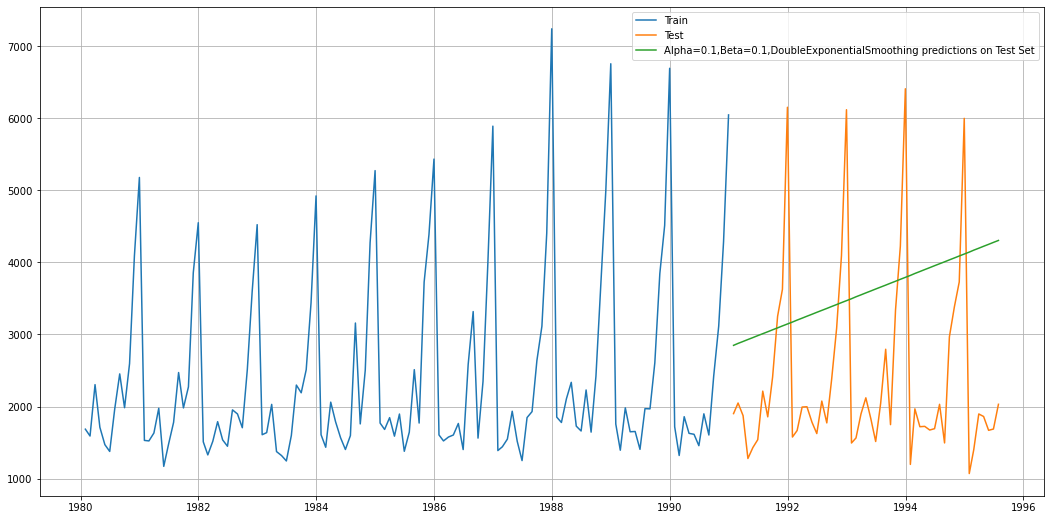

In [115]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [116]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2pointTrailingMovingAverage                     811.178937
4pointTrailingMovingAverage                    1184.213295
6pointTrailingMovingAverage                    1337.200524
9pointTrailingMovingAverage                    1422.653281
Alpha=0.995,SimpleExponentialSmoothing         1316.135411
Alpha=0.1,SimpleExponentialSmoothing           1375.393398
Alpha=0.0496,SimpleExponentialSmoothing        1316.135411
Alpha=0.1,SimpleExponentialSmoothing           1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1778.564670

Method 7: Triple Exponential Smoothing (Holt - Winter's Model)<br>
Three parameters α, β and γ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [117]:
TES_train = train.copy()
TES_test = test.copy()

In [118]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [119]:
model_TES_autofit = model_TES.fit()

In [120]:
model_TES_autofit.params

{'smoothing_level': 0.11108840858679117,
 'smoothing_trend': 0.061712060020663685,
 'smoothing_seasonal': 0.3950814802151603,
 'damping_trend': nan,
 'initial_level': 1639.9088356475902,
 'initial_trend': -11.928143593549056,
 'initial_seasons': array([1.05065032, 1.02086214, 1.41078482, 1.20263518, 0.97315225,
        0.96689379, 1.31724304, 1.70471609, 1.37289733, 1.81035002,
        2.83962708, 3.60997333]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [121]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1577.208163
1991-02-28       2049   1333.663154
1991-03-31       1874   1745.977341
1991-04-30       1279   1630.435405
1991-05-31       1432   1523.306429

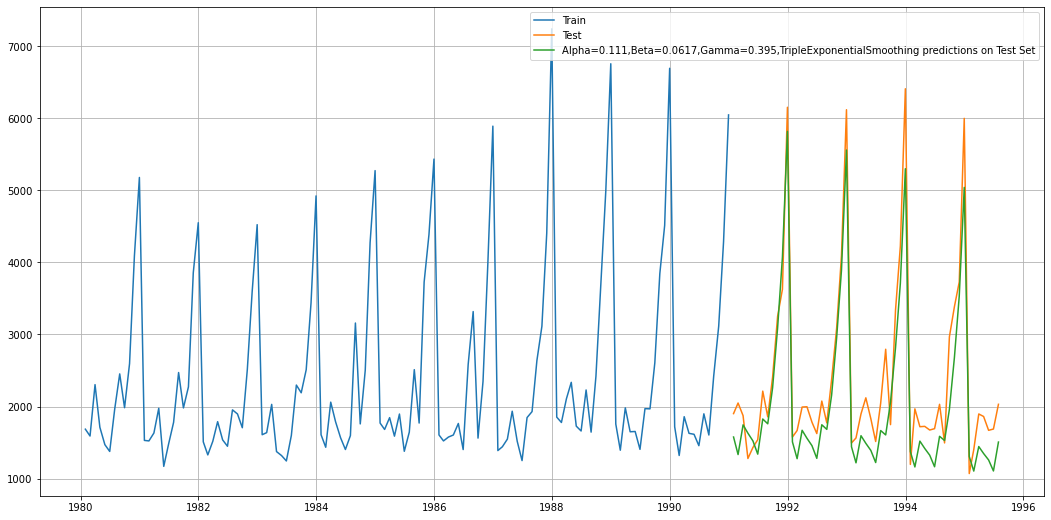

In [122]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [123]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.0617,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.0617,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.659


In [124]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.995,SimpleExponentialSmoothing              1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.0496,SimpleExponentialSmoothing             1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExpon...   469.659106

In [125]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [126]:
for i in np.arange(0.0,1.1,0.1):
    for j in np.arange(0.0,1.1,0.1):
        for k in np.arange(0.0,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [127]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0              0.0          0.0           0.0    2117.794609  3.934417e+03
1              0.0          0.0           0.1    5185.426811  2.722161e+04
2              0.0          0.0           0.2    8214.592317  4.554097e+04
3              0.0          0.0           0.3   10670.142261  5.805787e+04
4              0.0          0.0           0.4   12566.129842  6.495477e+04
...            ...          ...           ...            ...           ...
1326           1.0          1.0           0.6  153394.791827  7.989790e+05
1327           1.0          1.0           0.7   94040.964957  1.074413e+06
1328           1.0          1.0           0.8  102196.953755  5.010607e+06
1329           1.0          1.0           0.9   77924.294413  4.318265e+05
1330           1.0          1.0           1.0  239917.432848  1.254280e+05

[1331 rows x 5 columns]

In [128]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
497           0.4          0.1           0.2  389.772245  336.715250
387           0.3          0.2           0.2  395.529174  350.145204
265           0.2          0.2           0.1  405.333164  352.571689
375           0.3          0.1           0.1  394.630053  352.607849
155           0.1          0.3           0.1  414.423963  354.534561

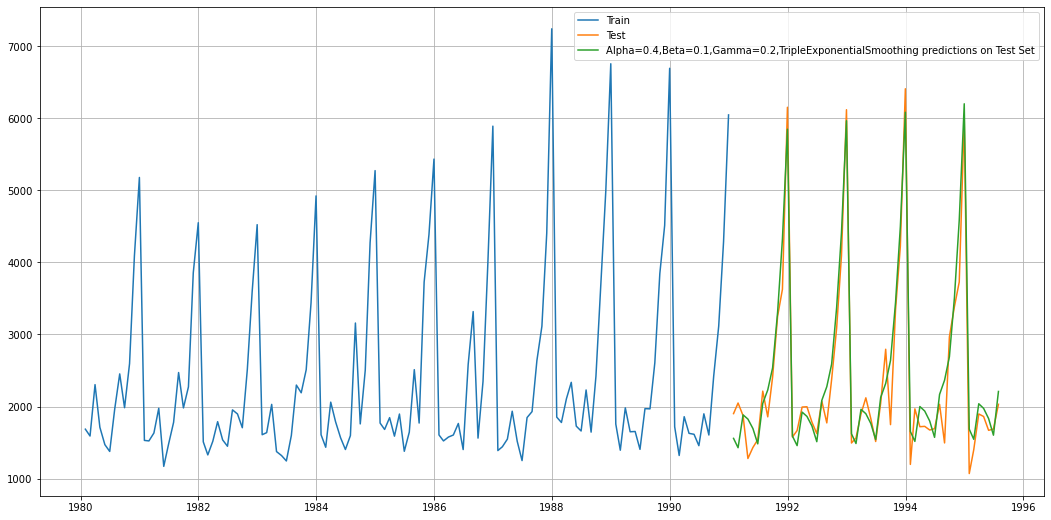

In [129]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [130]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.995,SimpleExponentialSmoothing              1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.0496,SimpleExponentialSmoothing             1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExpon...   469.659106
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250

In [131]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExpon...   469.659106
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
SimpleAverageModel                                  1275.081804
Alpha=0.995,SimpleExponentialSmoothing              1316.135411
Alpha=0.0496,SimpleExponentialSmoothing             1316.135411
6pointTrailingMovingAverage                         1337.200524
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
RegressionOnTime                                    1389.135175
9pointTrailingMovingAverage                         1422.653281
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

Here we had built different models on the data and have compared these model with the best RMSE value on the test data.

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the other models.

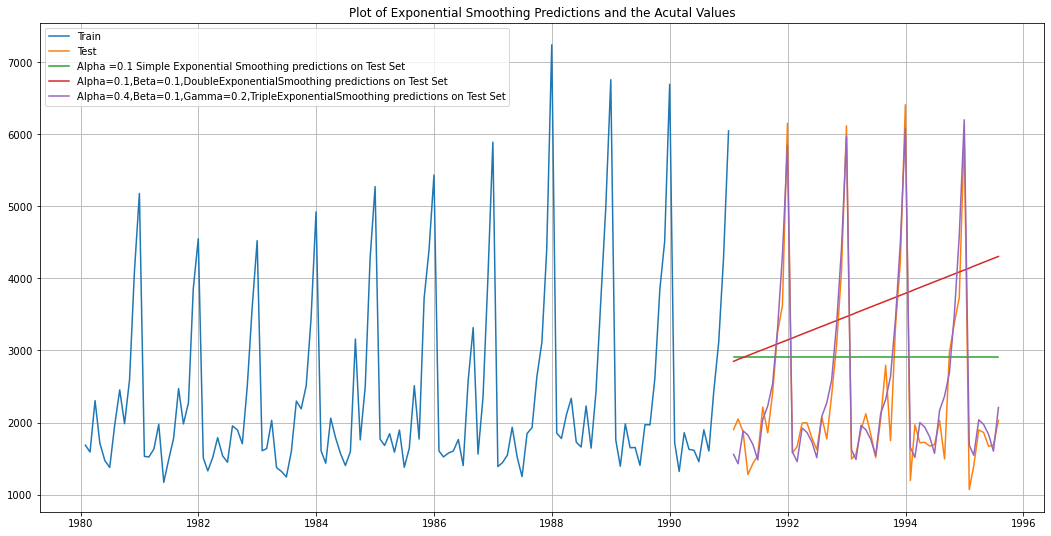

In [132]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');


## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

#### Here we can state that the hypothesis and null hypothesis on the data to whether data have stationary or not.

Null hypothesis - H0: Provided data is non-stationary <br>
Hypothesis - Ha: Provided data is stationary

## Check for stationarity of the whole Time Series data.

In [133]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

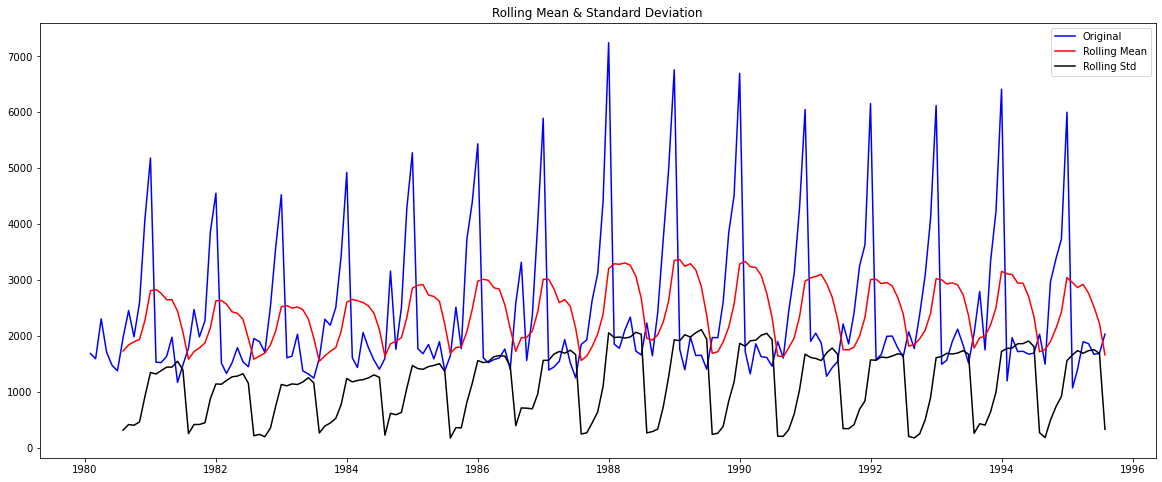

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [135]:
test_stationarity(df_2['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

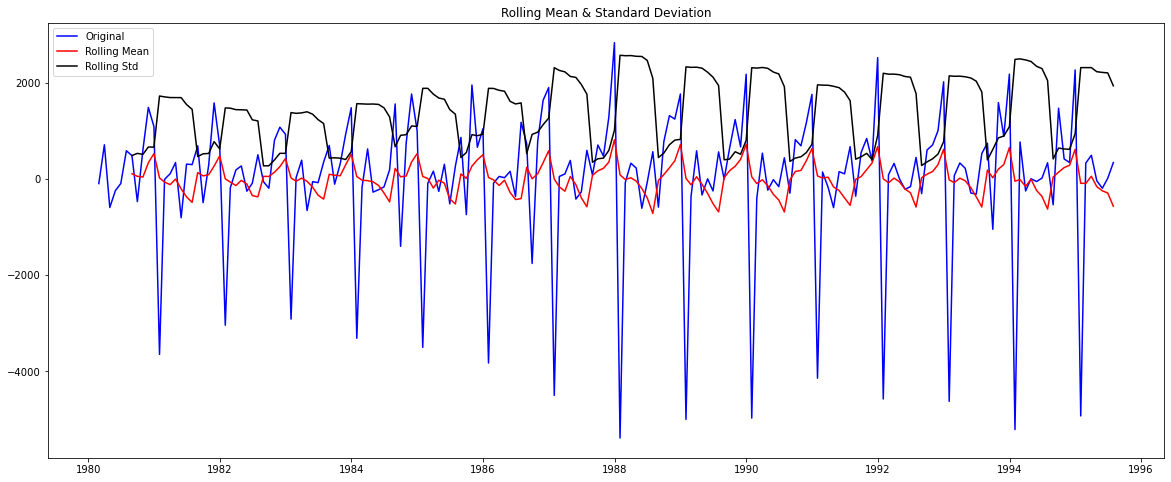

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [136]:
test_stationarity(df_2['Sparkling'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

#### Check for stationarity of the Training Data Time Series.

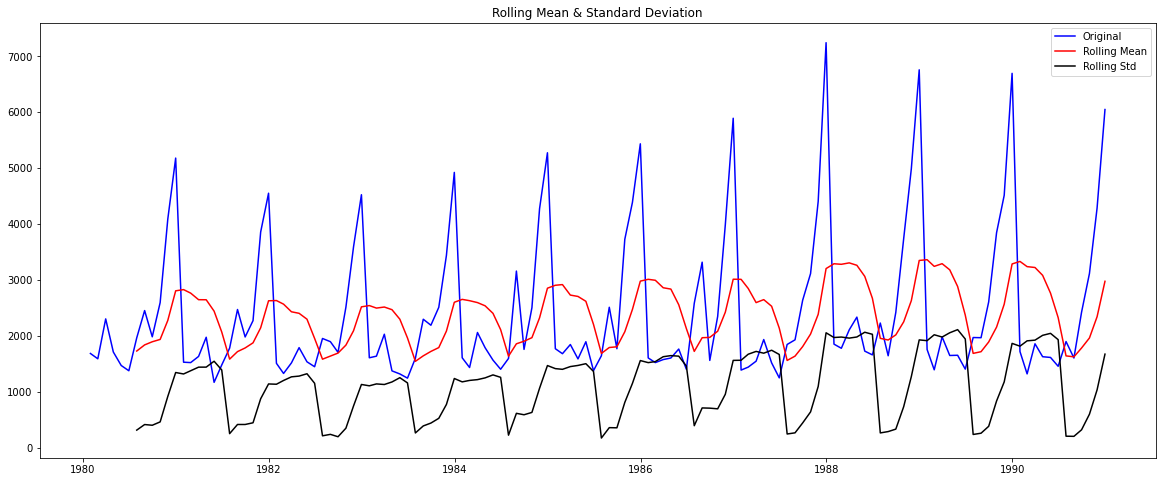

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [137]:
test_stationarity(train['Sparkling'])

We see that the series is not stationary at $\alpha$ = 0.05.

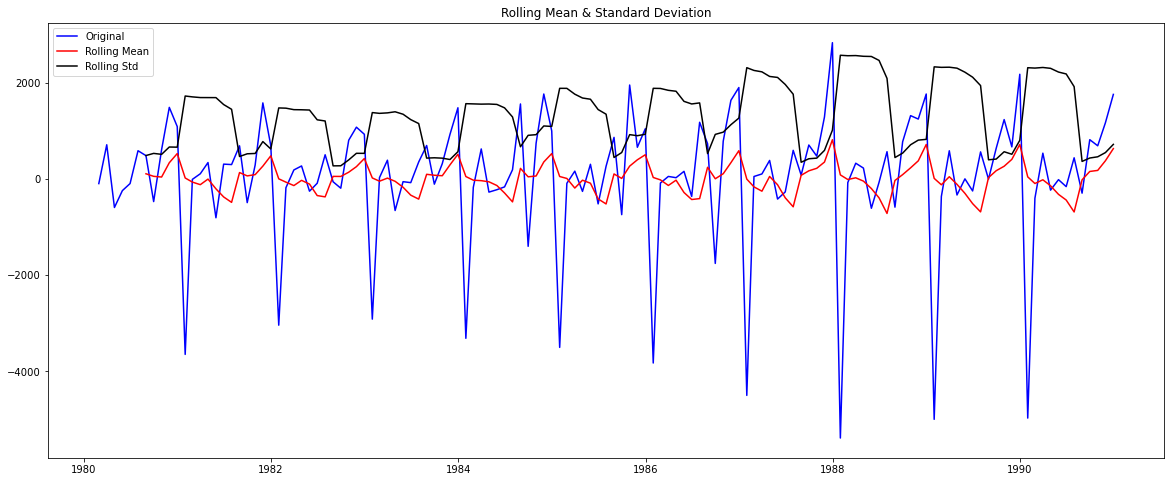

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [138]:
test_stationarity(train['Sparkling'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [149]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [150]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [151]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577
ARIMA(0, 1, 2) - AIC:2232.7830976841233
ARIMA(1, 1, 0) - AIC:2268.5280606259744


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

ARIMA(1, 1, 1) - AIC:2235.0139453498964
ARIMA(1, 1, 2) - AIC:2233.597647119215
ARIMA(2, 1, 0) - AIC:2262.035600157607
ARIMA(2, 1, 1) - AIC:2232.3604898812396


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 2) - AIC:2210.619378692588


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWar

In [152]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.619379
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906439
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [153]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.310
Method:                       css-mle   S.D. of innovations           1012.813
Date:                Sun, 19 Dec 2021   AIC                           2210.619
Time:                        08:50:26   BIC                           2227.871
Sample:                    02-29-1980   HQIC                          2217.629
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5852      0.517     10.799      0.000       4.571       6.599
ar.L1.D.Sparkling     1.2699      0.075     17.045      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWar

## Predict on the Test Set using this model and evaluate the model.

In [154]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [155]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.549421831278


In [156]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf,resultsDf_9])

resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.995,SimpleExponentialSmoothing              1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.0496,SimpleExponentialSmoothing             1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExpon...   469.659106
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
ARIMA(2,1,2)                                        1374.549422

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

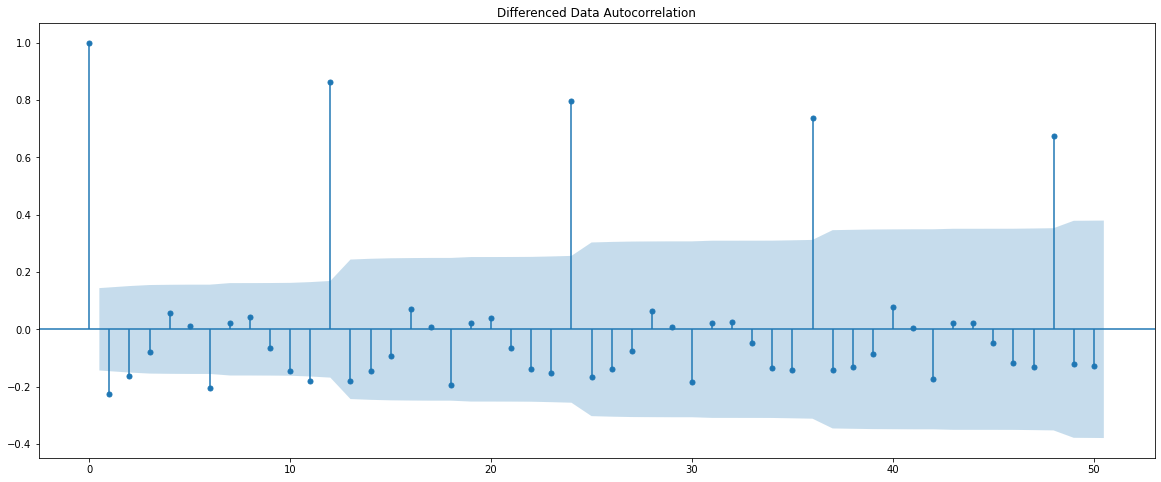

In [163]:
plot_acf(df_2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality 12.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [164]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [165]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [166]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684592
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640237396
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530139051
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791978
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158617236
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920742
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566505
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957303265
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837643
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193762038
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319653947796
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954179886
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.224508498489
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018825853375
SARIMA(0, 1, 2)x

In [167]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934564
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [168]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 19 Dec 2021   AIC                           1555.584
Time:                                    09:07:29   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

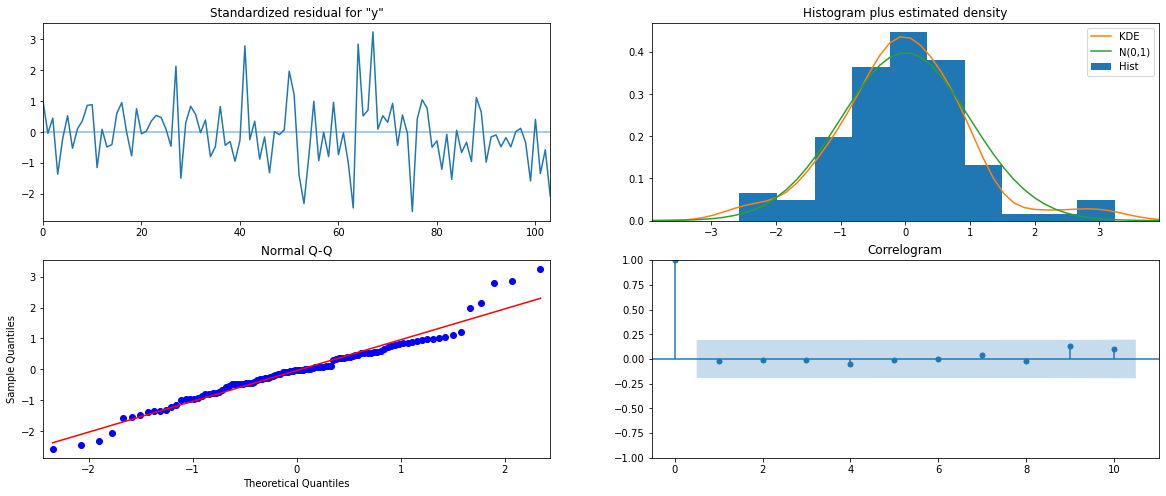

In [169]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [170]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [171]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.404037  388.344284     566.263227    2088.544847
1  1315.133358  402.007764     527.212620    2103.054096
2  1621.614254  402.001365     833.706057    2409.522450
3  1598.886537  407.238703     800.713347    2397.059728
4  1392.711823  407.968746     593.107774    2192.315872

In [172]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5925502856952


In [174]:
resultsDf_9_2 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_9_2])

resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.995,SimpleExponentialSmoothing              1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.0496,SimpleExponentialSmoothing             1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExpon...   469.659106
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
ARIMA(2,1,2)                                        1374.549422
ARIMA(3,1,2)                                        1379.051960
ARIMA_manual(3,1,2)                                 1379.051960
SARIMA(1,1,2)(1,0,2,12)                              528.592550
SARIMA(1,1,2)(1,0,2,12)                              528.592550

We see that the RMSE value have reduced further when the seasonality parameter used to 12 compared with ARIMA model.

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Let us look at the ACF and the PACF plots once more.

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


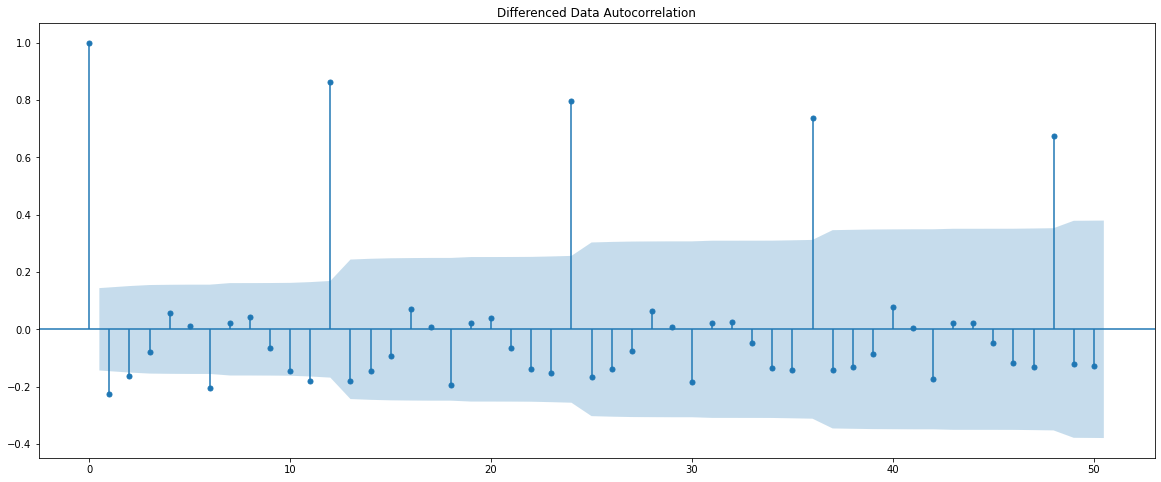

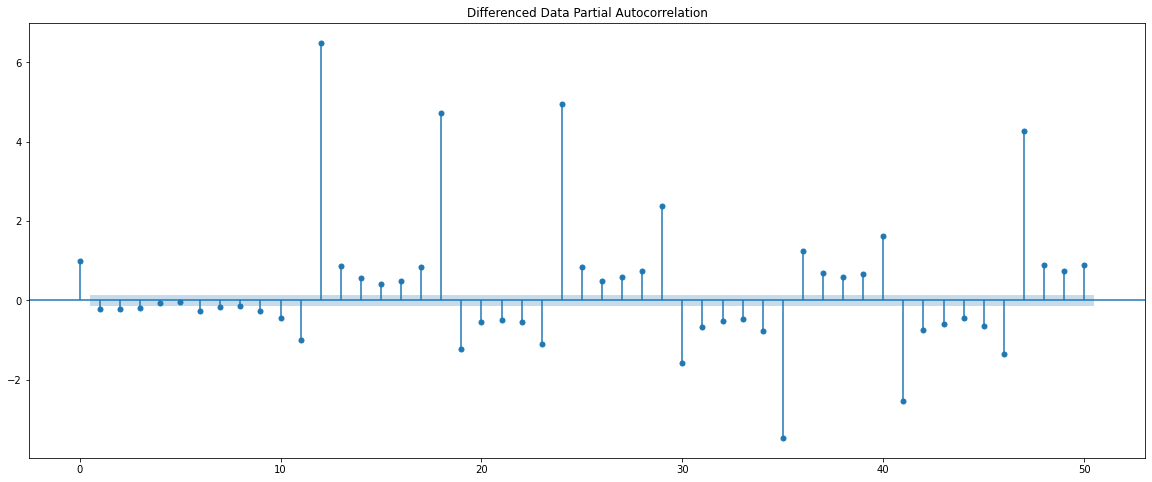

In [157]:
plot_acf(df_2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.


In [158]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.230
Date:                Sun, 19 Dec 2021   AIC                           2228.928
Time:                        08:58:03   BIC                           2249.054
Sample:                    02-29-1980   HQIC                          2237.106
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9846      3.643      1.643      0.100      -1.156      13.125
ar.L1.D.Sparkling    -0.4419   1.21e-05  -3.64e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWar

## Predict on the Test Set using this model and evaluate the model.

In [159]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [160]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1379.0519598107514


In [162]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA_manual(3,1,2)'])


resultsDf = pd.concat([resultsDf,resultsDf_9_1])

resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.995,SimpleExponentialSmoothing              1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.0496,SimpleExponentialSmoothing             1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExpon...   469.659106
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
ARIMA(2,1,2)                                        1374.549422
ARIMA(3,1,2)                                        1379.051960
ARIMA_manual(3,1,2)                                 1379.051960

We see that there is difference in the RMSE values for both the ARIMA models.

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


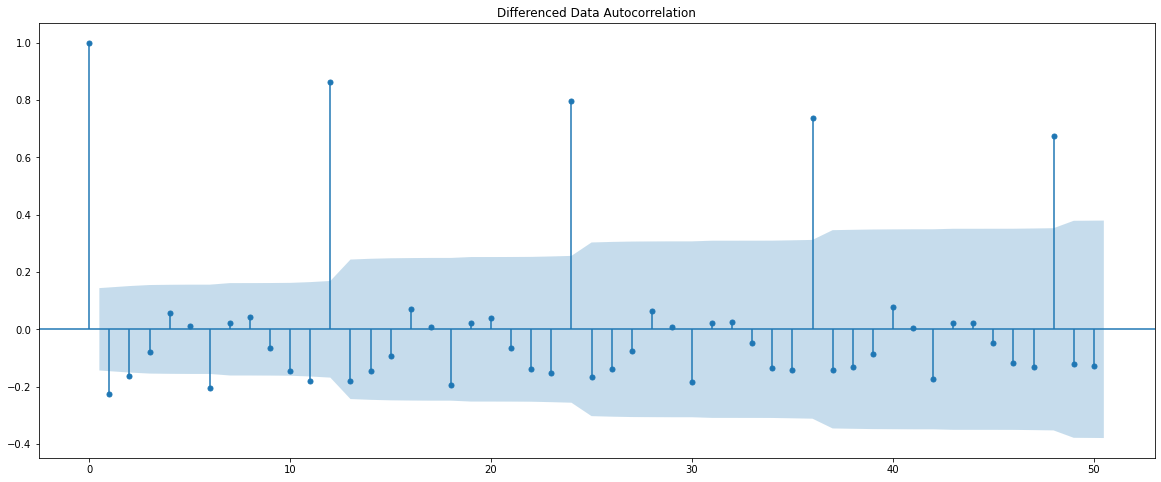

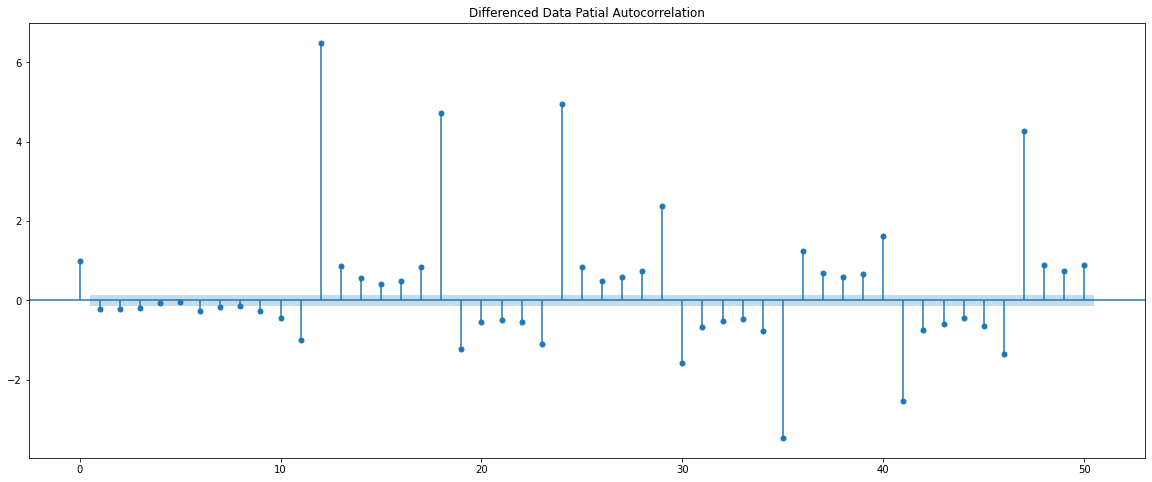

In [175]:
plot_acf(df_2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

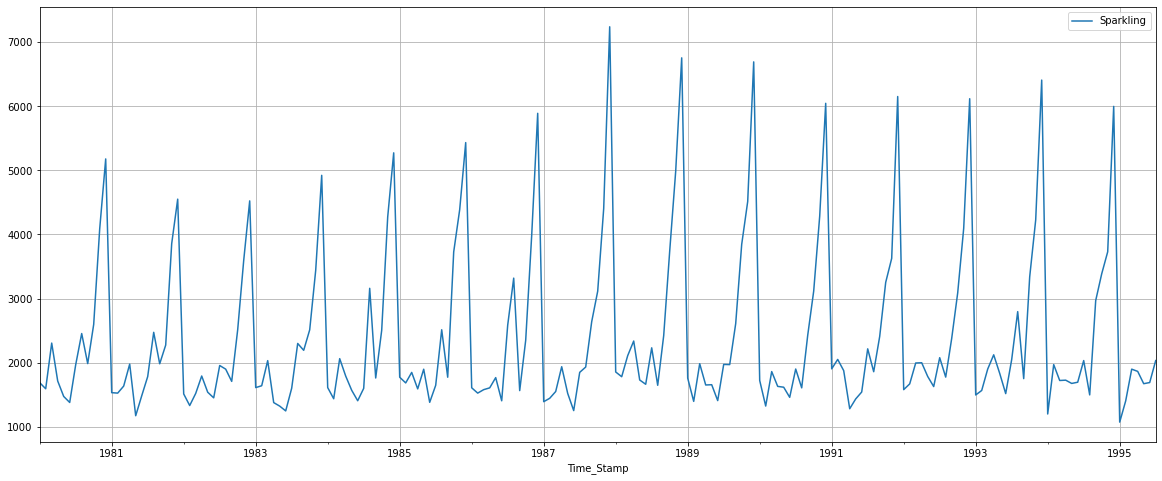

In [176]:
df_2.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

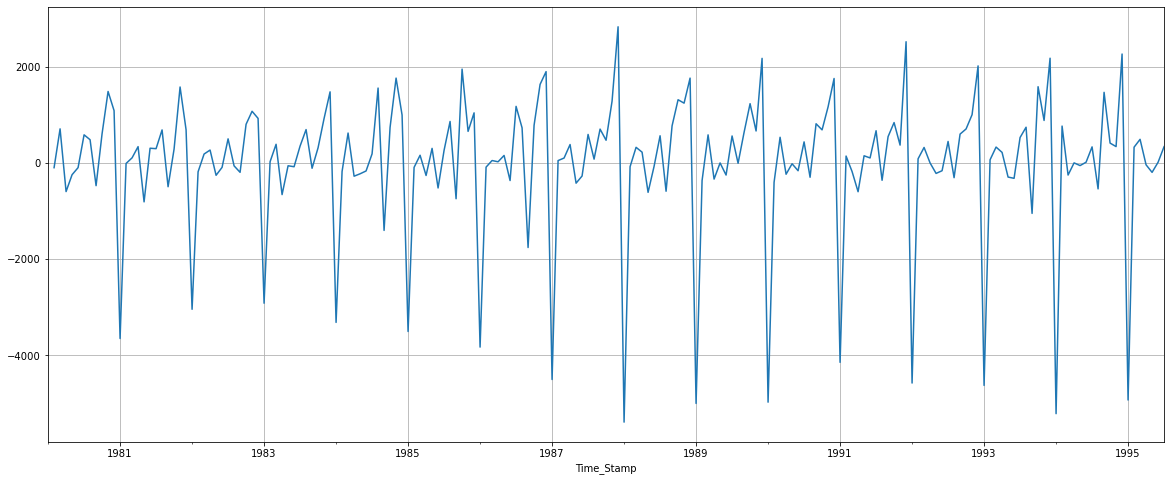

In [177]:
(df_2['Sparkling'].diff()).plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

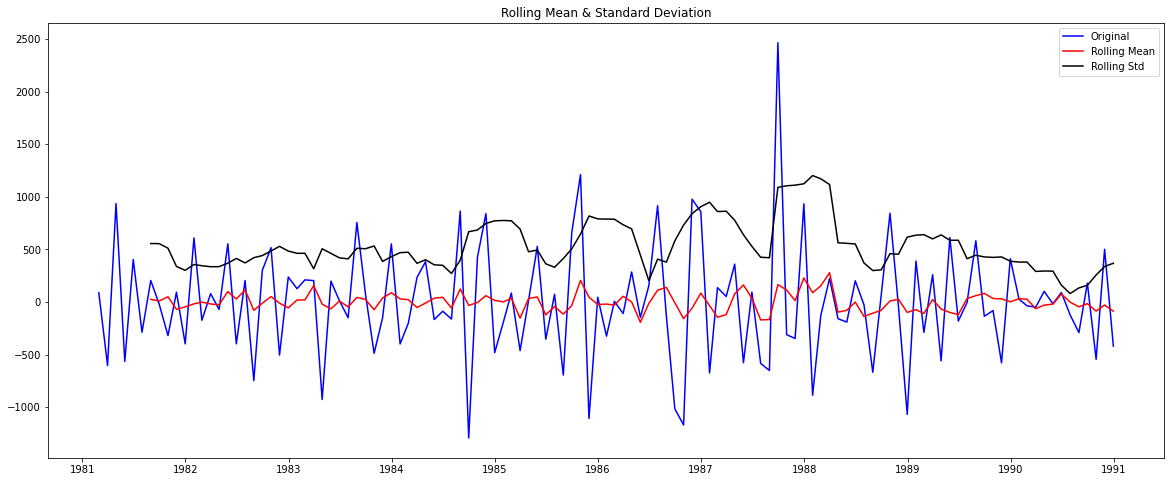

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [178]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

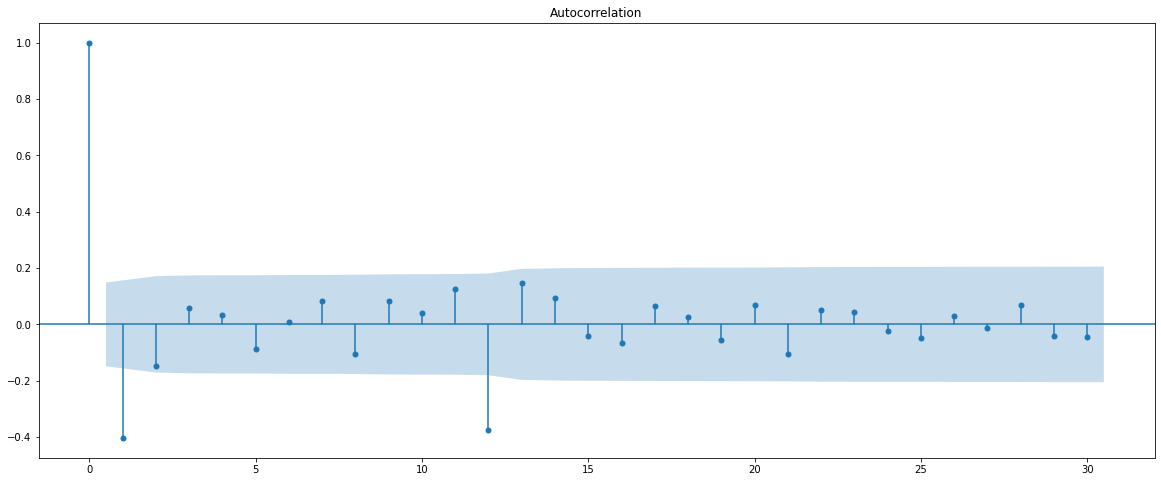

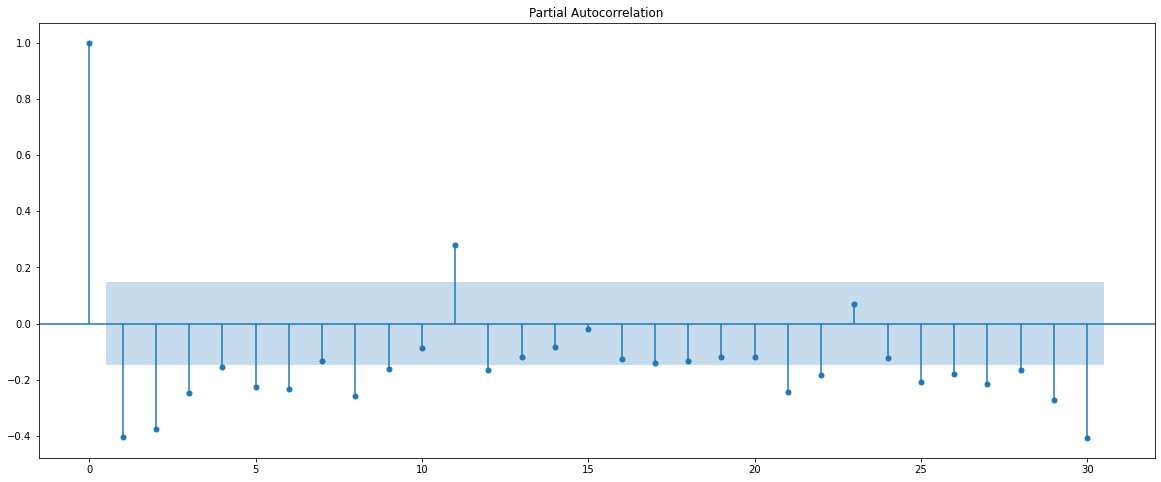

In [179]:
plot_acf((df_2['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_2['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 3. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 2.
Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).

In [182]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, 2, 12)   Log Likelihood                -683.851
Date:                            Sun, 19 Dec 2021   AIC                           1389.702
Time:                                    09:35:19   BIC                           1417.442
Sample:                                         0   HQIC                          1400.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5574      0.464     -1.202      0.229      -1.466       0.351
ar.L2         -0.0377      0.206   

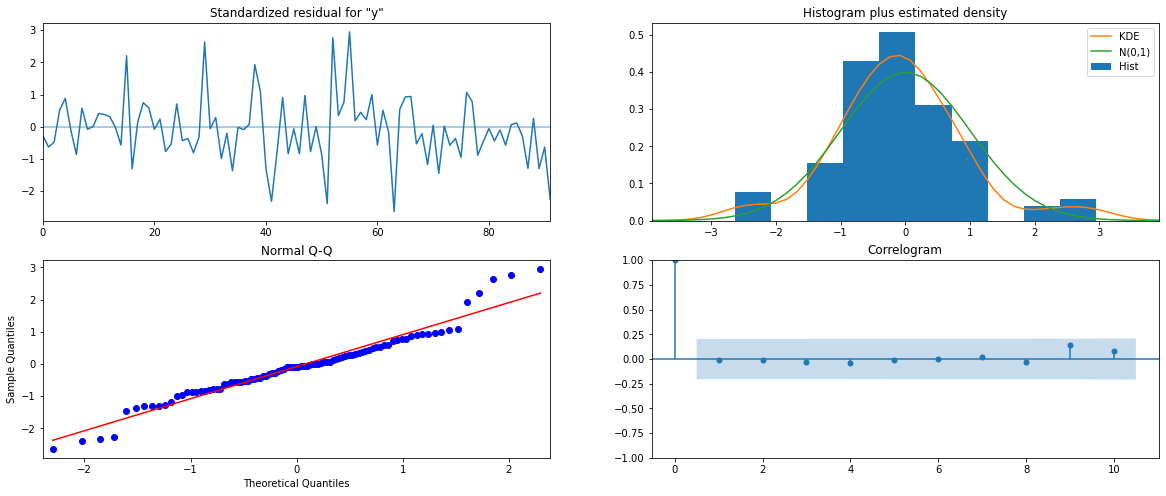

In [183]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [184]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [185]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1296.201982  402.878709     506.574222    2085.829743
1  1270.871973  414.827069     457.825859    2083.918088
2  1559.750102  414.828067     746.702031    2372.798173
3  1567.698315  423.519374     737.615594    2397.781035
4  1365.157375  424.475273     533.201127    2197.113622

In [187]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

598.14940784627


In [189]:
resultsDf_9_3 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA_manual(3,1,2)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_9_3])

resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.995,SimpleExponentialSmoothing              1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.0496,SimpleExponentialSmoothing             1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExpon...   469.659106
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
ARIMA(2,1,2)                                        1374.549422
ARIMA(3,1,2)                                        1379.051960
ARIMA_manual(3,1,2)                                 1379.051960
SARIMA(1,1,2)(1,0,2,12)                              528.592550
SARIMA(1,1,2)(1,0,2,12)                              528.592550
SARIMA(3,1,2)(3,0,2,12)                              598.149408
SARIMA_manual(3,1,2)(3,0,2,12)                       598.149408

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [190]:
resultsDf = pd.DataFrame({'Test RMSE': []})
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf = pd.concat([resultsDf,resultsDf_9])
resultsDf = pd.concat([resultsDf,resultsDf_9_1])
resultsDf = pd.concat([resultsDf,resultsDf_9_2])
resultsDf = pd.concat([resultsDf,resultsDf_9_3])

resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.0496,SimpleExponentialSmoothing             1316.135411
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExpon...   469.659106
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
ARIMA(2,1,2)                                        1374.549422
ARIMA_manual(3,1,2)                                 1379.051960
SARIMA(1,1,2)(1,0,2,12)                              528.592550
SARIMA_manual(3,1,2)(3,0,2,12)                       598.149408

In [191]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   336.715250
Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExpon...   469.659106
SARIMA(1,1,2)(1,0,2,12)                              528.592550
SARIMA_manual(3,1,2)(3,0,2,12)                       598.149408
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
SimpleAverageModel                                  1275.081804
Alpha=0.0496,SimpleExponentialSmoothing             1316.135411
6pointTrailingMovingAverage                         1337.200524
ARIMA(2,1,2)                                        1374.549422
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
ARIMA_manual(3,1,2)                                 1379.051960
RegressionOnTime                                    1389.135175
9pointTrailingMovingAverage                         1422.653281
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters α = 0.4, β = 0.1 and γ = 0.2.

For this data set, we can build only the top 1 model which gave us the best accuracy (least RMSE).

This one model to be built on the whole data are the following:

Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing

In [192]:
fullmodel1 = ExponentialSmoothing(df_2,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [193]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_2['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 376.774617512341


In [194]:
# Getting the predictions for the 12 months
prediction_1 = fullmodel1.forecast(steps=12)

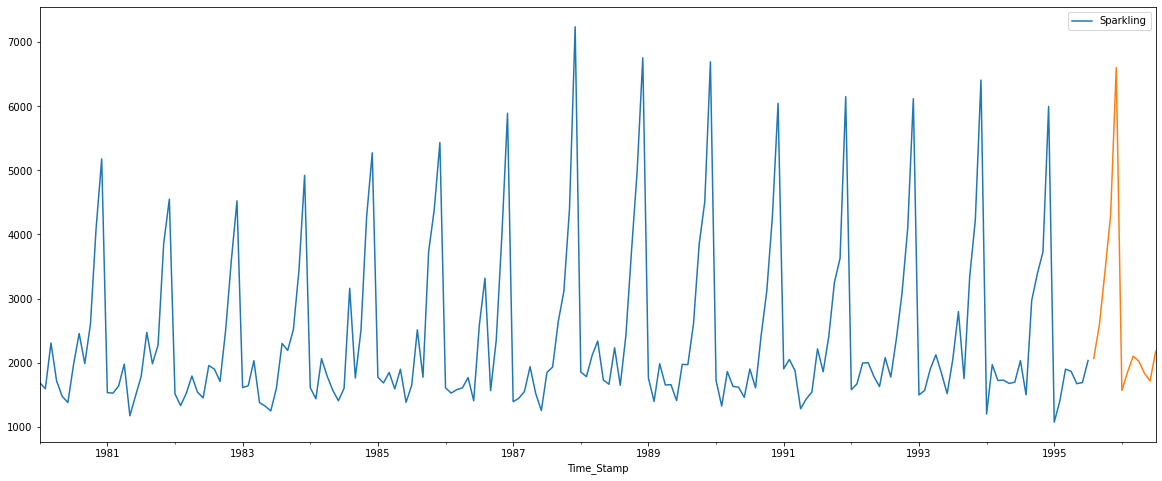

In [195]:
df_2.plot()
prediction_1.plot();

In [196]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df_2 = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df_2

lower_CI   prediction     upper_ci
1995-08-31  1322.989337  2063.449003  2803.908669
1995-09-30  1838.947945  2579.407611  3319.867277
1995-10-31  2676.194903  3416.654569  4157.114235
1995-11-30  3564.017841  4304.477507  5044.937173
1995-12-31  5864.417326  6604.876992  7345.336658
1996-01-31   824.080268  1564.539934  2304.999600
1996-02-29  1109.300430  1849.760096  2590.219762
1996-03-31  1358.419272  2098.878937  2839.338603
1996-04-30  1281.969204  2022.428870  2762.888536
1996-05-31  1094.080979  1834.540644  2575.000310
1996-06-30   971.949271  1712.408937  2452.868603
1996-07-31  1435.965864  2176.425530  2916.885196

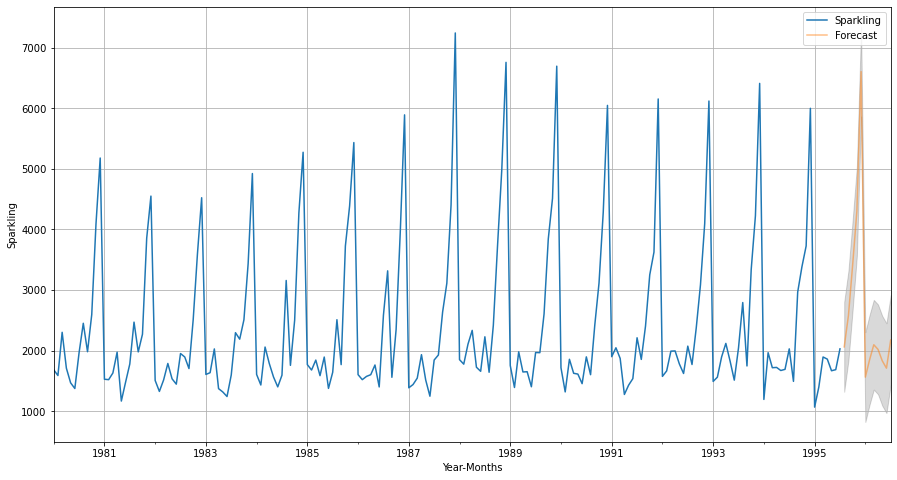

In [198]:
# plot the forecast along with the confidence band

axis = df_2.plot(label='Actual', figsize=(15,8))
pred_1_df_2['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df_2.index, pred_1_df_2['lower_CI'], pred_1_df_2['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

For the this dataset, we had trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the other models based on the RMSE value.

In this particular case, we have built several models and find the best model for forecasting. This model gave us the best accuracy on the forecast data since it has the least RMSE value. The next 12 month data is forecasted using the provided data with the parameters of Alpha=0.4, Beta=0.1, Gamma=0.2 using Triple Exponential Smoothing model.

In order to forecast, we train and test the accuracy in the provided data and select best model. The forecasted data will not be 100% match with next month’s original data. So that we have mentioned with 95% confident level and data also forecasted with lower and upper confidance intervals. 

Steps performed in this project: 
1.	We have used the below models and check the RMSE values to find the better model for time series forecasting. The models are,
Simple Exponential Smoothing, Double Exponential Smoothing, Triple Exponential Smoothing, ARIMA, SARIMA, Moving Average, Simple Average, Linear Regression and Naïve Model.
2.	Find the Low RMSE model and forecast the 12 month data with 95% confidance intervals.

Suggestion to the company to get more wine sales:
1.	Introduce varieties in the products based on  flavours, packing etc based on customer needs
2.	Make the products available in various quantities by volume.
3.	Create combo offers like customised packs in various quantities along with the bestselling ones.
4.	Offers to regular customers on purchases based on volumes.
5.	Offers for recommendations and referrals.
6.	New product introduction based on the prior customer survey to meet the exact demand of the market. 
7.	Also, make survey to measure the popularity or suggestion on the existing product. It will help to make an improvement on sales.
8.	Frequent campaigns and customer engagements to understand the consumer behaviour.
9.	Make use of online store to get more sales.
10.	Make an offers to reduce the delivery charge or give addition of free product for high volume purchases.

